<a href="https://colab.research.google.com/github/Godwin-88/MLEn/blob/main/Robust_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

# Define the tickers and the time period
tickers = ['BTC-USD', 'GC=F', 'CL=F']  # Bitcoin, Gold, Oil
start_date = '2019-12-10'  # 5 years ago from today (Dec 10, 2024)
end_date = '2024-12-10'    # Today

# Fetch data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Rename columns for clarity
data.columns = ['Bitcoin', 'Gold', 'Oil']

[*********************100%***********************]  3 of 3 completed


In [2]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

for column in data.columns:
    print(f"Outliers for {column}:")
    print(detect_outliers(data, column))

Outliers for Bitcoin:
                  Bitcoin       Gold          Oil
Date                                             
2024-11-20   94339.492188  68.870003  2648.199951
2024-11-21   98504.726562  70.099998  2672.100098
2024-11-22   98997.664062  71.239998  2709.899902
2024-11-23   97777.281250        NaN          NaN
2024-11-24   98013.820312        NaN          NaN
2024-11-27   95962.531250  68.720001  2639.899902
2024-11-28   95652.468750  68.879997  2639.699951
2024-11-29   97461.523438  68.000000  2657.000000
2024-11-30   96449.054688        NaN          NaN
2024-12-01   97279.789062        NaN          NaN
2024-12-02   95865.304688  68.099998  2634.899902
2024-12-03   96002.164062  69.940002  2644.699951
2024-12-04   98768.531250  68.540001  2653.800049
2024-12-05   96593.570312  68.300003  2626.600098
2024-12-06   99920.710938  67.199997  2638.600098
2024-12-07   99923.335938        NaN          NaN
2024-12-08  101236.015625        NaN          NaN
2024-12-09   97432.718750  6

Regression with Outliers


In [3]:
from statsmodels.formula.api import rlm

# Prepare data for regression (assuming daily returns might be more meaningful)
returns = data.pct_change().dropna()
# Combine into a single DataFrame for regression
df_reg = pd.DataFrame({
    'Y': returns['Bitcoin'],
    'X1': returns['Gold'],
    'X2': returns['Oil']
})

# Robust Linear Model using Huber's T
model = rlm('Y ~ X1 + X2', data=df_reg).fit()
print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      Y   No. Observations:                 1826
Model:                            RLM   Df Residuals:                     1823
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 10 Dec 2024                                         
Time:                        16:54:22                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.001      2.359      0.0

<ipython-input-3-7dfa90c2f226>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the tickers and the time period
tickers = ['BTC-USD', 'GC=F', 'CL=F']  # Bitcoin, Gold, Oil
start_date = '2019-12-10'  # 5 years ago from today (Dec 10, 2024)
end_date = '2024-12-10'    # Today

# Fetch data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.columns = ['Bitcoin', 'Gold', 'Oil']

# Compute Log Returns
log_returns = np.log(data / data.shift(1))
log_returns.columns = ['Log_Return_Bitcoin', 'Log_Return_Gold', 'Log_Return_Oil']

# First Differencing (for raw price data)
first_diff = data.diff()
first_diff.columns = ['Diff_Bitcoin', 'Diff_Gold', 'Diff_Oil']

# Combine everything into one DataFrame
combined_data = pd.concat([data, log_returns, first_diff], axis=1)

print(combined_data.head())

[*********************100%***********************]  3 of 3 completed


                Bitcoin       Gold          Oil  Log_Return_Bitcoin  \
Date                                                                  
2019-12-10  7278.119629  59.240002  1462.599976                 NaN   
2019-12-11  7217.427246  58.759998  1469.400024           -0.008374   
2019-12-12  7243.134277  59.180000  1466.699951            0.003555   
2019-12-13  7269.684570  60.070000  1475.599976            0.003659   
2019-12-14  7124.673828        NaN          NaN           -0.020149   

            Log_Return_Gold  Log_Return_Oil  Diff_Bitcoin  Diff_Gold  Diff_Oil  
Date                                                                            
2019-12-10              NaN             NaN           NaN        NaN       NaN  
2019-12-11        -0.008136        0.004639    -60.692383  -0.480003  6.800049  
2019-12-12         0.007122       -0.001839     25.707031   0.420002 -2.700073  
2019-12-13         0.014927        0.006050     26.550293   0.889999  8.900024  
2019-12-14      

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Perform ADF test for each series
print("ADF Test for Log_Return_Bitcoin:")
adf_test(combined_data['Log_Return_Bitcoin'].dropna())

print("\nADF Test for Log_Return_Gold:")
adf_test(combined_data['Log_Return_Gold'].dropna())

print("\nADF Test for Log_Return_Oil:")
adf_test(combined_data['Log_Return_Oil'].dropna())

ADF Test for Log_Return_Bitcoin:
Results of Dickey-Fuller Test:
Test Statistic                -1.391462e+01
p-value                        5.431947e-26
#Lags Used                     8.000000e+00
Number of Observations Used    1.817000e+03
Critical Value (1%)           -3.433954e+00
Critical Value (5%)           -2.863132e+00
Critical Value (10%)          -2.567618e+00
dtype: float64

ADF Test for Log_Return_Gold:
Results of Dickey-Fuller Test:
Test Statistic                -6.511214e+00
p-value                        1.099223e-08
#Lags Used                     1.800000e+01
Number of Observations Used    9.680000e+02
Critical Value (1%)           -3.437123e+00
Critical Value (5%)           -2.864530e+00
Critical Value (10%)          -2.568362e+00
dtype: float64

ADF Test for Log_Return_Oil:
Results of Dickey-Fuller Test:
Test Statistic                -1.526930e+01
p-value                        4.741303e-28
#Lags Used                     4.000000e+00
Number of Observations Used    9.83

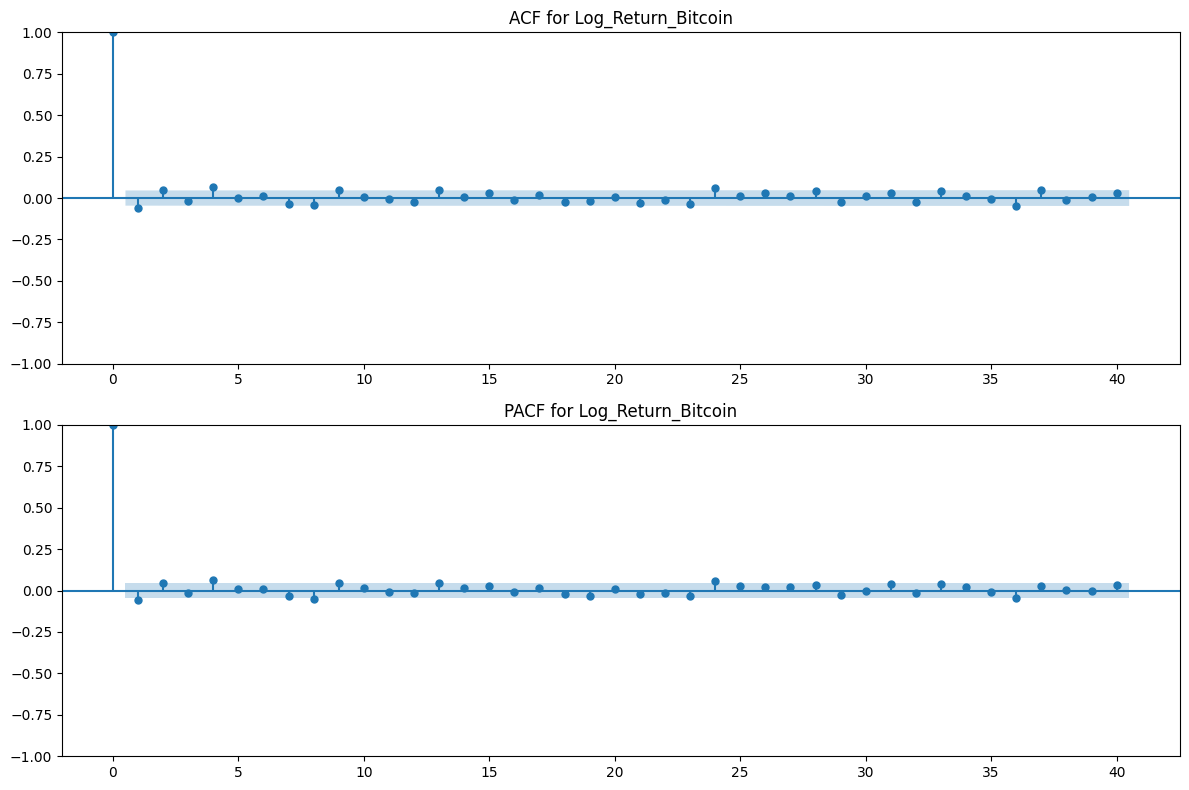

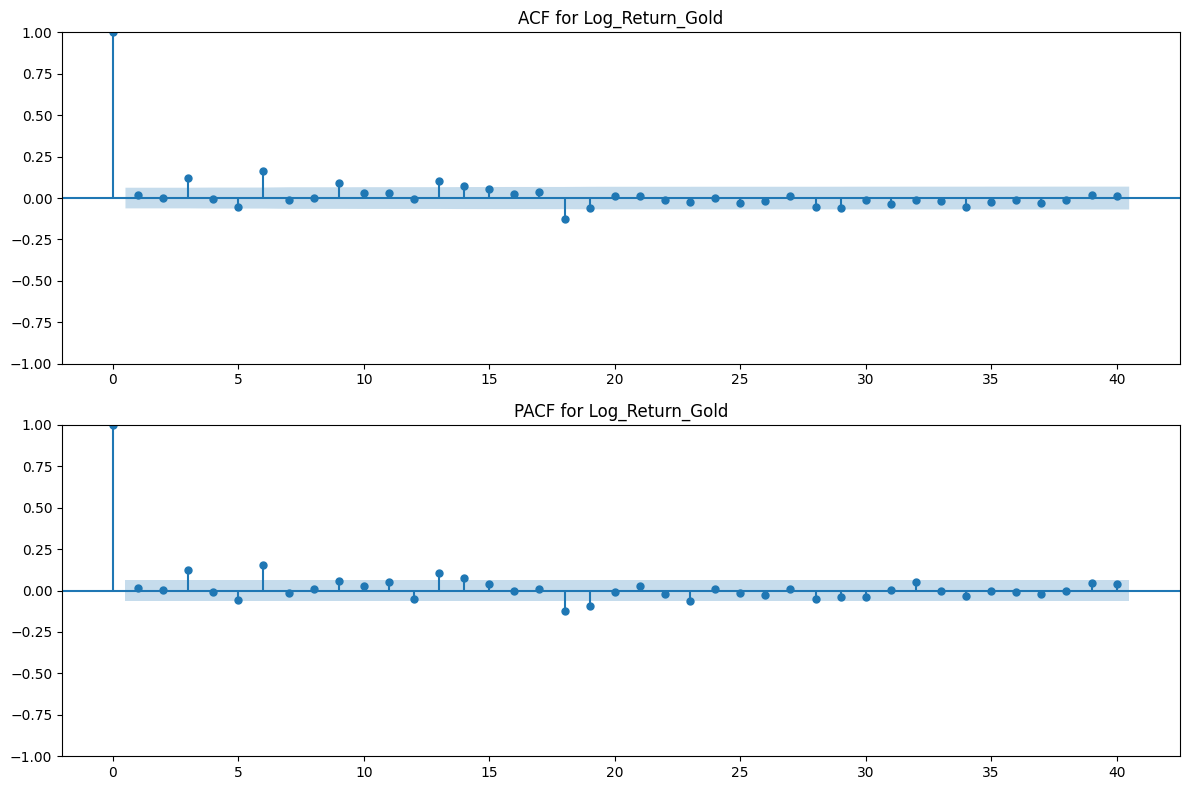

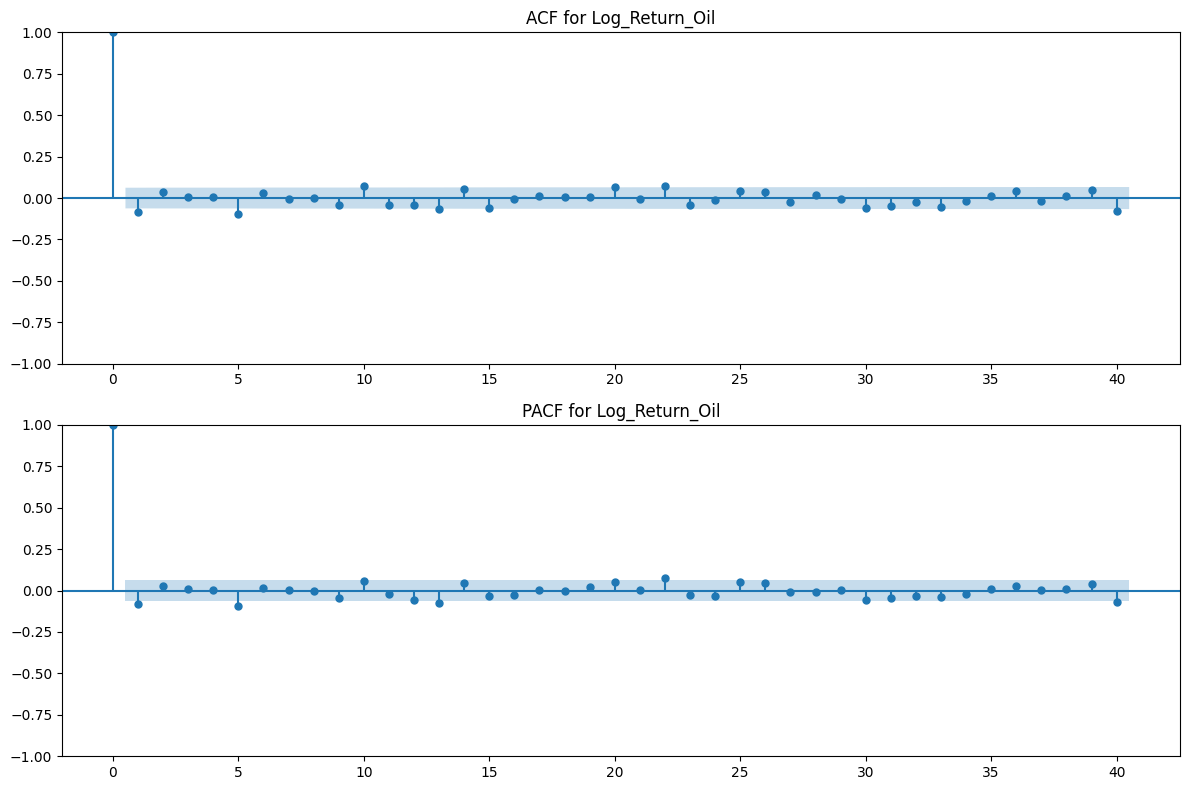

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'combined_data' is already defined with log returns
log_return_columns = ['Log_Return_Bitcoin', 'Log_Return_Gold', 'Log_Return_Oil']

# Loop through each column to plot ACF and PACF
for column in log_return_columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Plot ACF
    plot_acf(combined_data[column].dropna(), ax=ax1, lags=40)
    ax1.set_title(f'ACF for {column}')

    # Plot PACF
    plot_pacf(combined_data[column].dropna(), ax=ax2, lags=40)
    ax2.set_title(f'PACF for {column}')

    plt.tight_layout()
    plt.show()

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Assuming 'combined_data' is already defined with 'Log_Return_Bitcoin', 'Log_Return_Gold', 'Log_Return_Oil'

# Prepare data for ARIMA
y = combined_data['Log_Return_Bitcoin'].dropna()  # Dependent variable
X = combined_data[['Log_Return_Gold', 'Log_Return_Oil']].dropna()  # Exogenous variables

# Ensure y and X have the same length
y = y[X.index]

# List to store models
models = []

for p in range(1, 7):  # AR terms from 1 to 6
    # Fit ARIMA model with an AR term 'p', no differencing (d=0), and no MA term (q=0)
    model = ARIMA(y, exog=X, order=(p, 0, 0))  # AR(p)
    results = model.fit()
    models.append(results)

    # Print model summary
    print(f"\nSummary for AR({p}) model:")
    print(results.summary())

    # Optionally, you can save the AIC, BIC, etc., for later comparison
    print(f"AIC: {results.aic}")
    print(f"BIC: {results.bic}")
    print(f"HQIC: {results.hqic}")

# Now 'models' list contains all fitted ARIMA models for diagnostic purposes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for AR(1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1863.601
Date:                Tue, 10 Dec 2024   AIC                          -3717.202
Time:                        17:07:14   BIC                          -3692.729
Sample:                             0   HQIC                         -3707.895
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.001      1.162      0.245      -0.001       0.004
Log_Return_Gold     0.1307      0.030      4.328      0.000       0.072       0.190
Log_Re

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for AR(2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1863.697
Date:                Tue, 10 Dec 2024   AIC                          -3715.393
Time:                        17:07:14   BIC                          -3686.025
Sample:                             0   HQIC                         -3704.224
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.001      1.145      0.252      -0.001       0.004
Log_Return_Gold     0.1307      0.031      4.277      0.000       0.071       0.191
Log_Re

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for AR(3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 0, 0)   Log Likelihood                1863.729
Date:                Tue, 10 Dec 2024   AIC                          -3713.457
Time:                        17:07:15   BIC                          -3679.195
Sample:                             0   HQIC                         -3700.427
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.001      1.136      0.256      -0.001       0.004
Log_Return_Gold     0.1307      0.033      3.906      0.000       0.065       0.196
Log_Re

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for AR(4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 0, 0)   Log Likelihood                1863.736
Date:                Tue, 10 Dec 2024   AIC                          -3711.473
Time:                        17:07:16   BIC                          -3672.315
Sample:                             0   HQIC                         -3696.581
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.001      1.133      0.257      -0.001       0.004
Log_Return_Gold     0.1307      0.035      3.782      0.000       0.063       0.198
Log_Re

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for AR(5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 0, 0)   Log Likelihood                1864.255
Date:                Tue, 10 Dec 2024   AIC                          -3710.511
Time:                        17:07:16   BIC                          -3666.459
Sample:                             0   HQIC                         -3693.757
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.001      1.161      0.245      -0.001       0.004
Log_Return_Gold     0.1307      0.035      3.756      0.000       0.063       0.199
Log_Re

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for AR(6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(6, 0, 0)   Log Likelihood                1864.488
Date:                Tue, 10 Dec 2024   AIC                          -3708.976
Time:                        17:07:18   BIC                          -3660.029
Sample:                             0   HQIC                         -3690.361
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.001      1.126      0.260      -0.001       0.004
Log_Return_Gold     0.1334      0.035      3.828      0.000       0.065       0.202
Log_Re

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Assuming 'combined_data' is already defined with 'Log_Return_Bitcoin', 'Log_Return_Gold', 'Log_Return_Oil'

# Prepare data for ARIMA
y = combined_data['Log_Return_Bitcoin'].dropna()  # Dependent variable
X = combined_data[['Log_Return_Gold', 'Log_Return_Oil']].dropna()  # Exogenous variables

# Ensure y and X have the same length
y = y[X.index]

# List to store models
models = []

for p in range(1, 7):  # AR terms from 1 to 6
    # Fit ARIMA model with an AR term 'p', no differencing (d=0), and no MA term (q=0)
    model = ARIMA(y, exog=X, order=(p, 0, 0))  # AR(p)
    results = model.fit()
    models.append(results)

    # Print model summary
    print(f"\nSummary for AR({p}) model:")
    print(results.summary())

    # Optionally, you can save the AIC, BIC, etc., for later comparison
    print(f"AIC: {results.aic}")
    print(f"BIC: {results.bic}")
    print(f"HQIC: {results.hqic}")

# Now 'models' list contains all fitted ARIMA models for diagnostic purposes

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Assuming 'combined_data' is already defined with 'Log_Return_Bitcoin', 'Log_Return_Gold', 'Log_Return_Oil'

# Prepare data for ARIMA
y = combined_data['Log_Return_Bitcoin'].dropna()  # Dependent variable
X = combined_data[['Log_Return_Gold', 'Log_Return_Oil']].dropna()  # Exogenous variables

# Ensure y and X have the same length
y = y[X.index]

# List to store models
models = []

# Generate all combinations of p, d, q from 1 to 7
pdq = list(itertools.product(range(1, 8), range(1, 8), range(1, 8)))

for param in pdq:
    p, d, q = param
    try:
        # Fit ARIMA model
        model = ARIMA(y, exog=X, order=(p, d, q))
        results = model.fit()
        models.append(results)

        # Print model summary
        print(f"\nSummary for ARIMA({p},{d},{q}) model:")
        print(results.summary())

        # Optionally, you can save the AIC, BIC, etc., for later comparison
        print(f"AIC: {results.aic}")
        print(f"BIC: {results.bic}")
        print(f"HQIC: {results.hqic}")
    except:
        # Log the model parameters that led to an error
        print(f"ARIMA({p},{d},{q}) failed to fit")
        continue

# Now 'models' list contains all fitted ARIMA models for diagnostic purposes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(1,1,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1857.822
Date:                Tue, 10 Dec 2024   AIC                          -3705.643
Time:                        17:10:10   BIC                          -3681.175
Sample:                             0   HQIC                         -3696.337
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1331      0.029      4.585      0.000       0.076       0.190
Log_Return_Oil      0.3654      0.101      3.626      0.000       0.168       0.563

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(1,1,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1851.975
Date:                Tue, 10 Dec 2024   AIC                          -3691.951
Time:                        17:10:15   BIC                          -3662.589
Sample:                             0   HQIC                         -3680.783
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1390      0.029      4.741      0.000       0.082       0.196
Log_Return_Oil      0.3399      0.098      3.462      0.001       0.147       0.532

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(1,1,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 1, 3)   Log Likelihood                1857.195
Date:                Tue, 10 Dec 2024   AIC                          -3700.390
Time:                        17:10:17   BIC                          -3666.134
Sample:                             0   HQIC                         -3687.361
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1377      0.030      4.606      0.000       0.079       0.196
Log_Return_Oil      0.4358      0.099      4.424      0.000       0.243       0.629

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,1,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 1, 5)   Log Likelihood                1857.896
Date:                Tue, 10 Dec 2024   AIC                          -3697.793
Time:                        17:10:23   BIC                          -3653.750
Sample:                             0   HQIC                         -3681.042
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1324      0.033      3.991      0.000       0.067       0.197
Log_Return_Oil      0.3610      0.102      3.523      0.000       0.160       0.562

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(1,1,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 1, 6)   Log Likelihood                1857.767
Date:                Tue, 10 Dec 2024   AIC                          -3695.535
Time:                        17:10:30   BIC                          -3646.598
Sample:                             0   HQIC                         -3676.923
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1366      0.034      4.042      0.000       0.070       0.203
Log_Return_Oil      0.3704      0.100      3.695      0.000       0.174       0.567

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(1,1,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 1, 7)   Log Likelihood                1857.530
Date:                Tue, 10 Dec 2024   AIC                          -3693.061
Time:                        17:10:35   BIC                          -3639.231
Sample:                             0   HQIC                         -3672.588
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1297      0.034      3.804      0.000       0.063       0.197
Log_Return_Oil      0.4041      0.101      4.004      0.000       0.206       0.602

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,2,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 2, 1)   Log Likelihood                1640.778
Date:                Tue, 10 Dec 2024   AIC                          -3271.555
Time:                        17:10:37   BIC                          -3247.092
Sample:                             0   HQIC                         -3262.251
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1253      0.030      4.122      0.000       0.066       0.185
Log_Return_Oil      0.3175      0.110      2.881      0.004       0.102       0.533

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(1,2,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 2, 2)   Log Likelihood                1846.632
Date:                Tue, 10 Dec 2024   AIC                          -3681.264
Time:                        17:10:41   BIC                          -3651.908
Sample:                             0   HQIC                         -3670.098
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1531      0.026      5.906      0.000       0.102       0.204
Log_Return_Oil      0.3275      0.100      3.280      0.001       0.132       0.523

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,2,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 2, 3)   Log Likelihood                1839.155
Date:                Tue, 10 Dec 2024   AIC                          -3664.310
Time:                        17:10:45   BIC                          -3630.061
Sample:                             0   HQIC                         -3651.284
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1259      0.026      4.817      0.000       0.075       0.177
Log_Return_Oil      0.3584      0.093      3.863      0.000       0.177       0.540

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,2,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 2, 4)   Log Likelihood                1845.845
Date:                Tue, 10 Dec 2024   AIC                          -3675.690
Time:                        17:10:49   BIC                          -3636.549
Sample:                             0   HQIC                         -3660.803
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1313      0.026      4.959      0.000       0.079       0.183
Log_Return_Oil      0.3627      0.099      3.654      0.000       0.168       0.557

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(1,2,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 2, 5)   Log Likelihood                1845.925
Date:                Tue, 10 Dec 2024   AIC                          -3673.849
Time:                        17:10:53   BIC                          -3629.815
Sample:                             0   HQIC                         -3657.101
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1284      0.028      4.613      0.000       0.074       0.183
Log_Return_Oil      0.2666      0.100      2.653      0.008       0.070       0.464

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,2,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 2, 6)   Log Likelihood                1846.219
Date:                Tue, 10 Dec 2024   AIC                          -3672.439
Time:                        17:11:00   BIC                          -3623.512
Sample:                             0   HQIC                         -3653.830
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1345      0.031      4.400      0.000       0.075       0.194
Log_Return_Oil      0.2702      0.101      2.674      0.007       0.072       0.468

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,2,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 2, 7)   Log Likelihood                1846.396
Date:                Tue, 10 Dec 2024   AIC                          -3670.793
Time:                        17:11:05   BIC                          -3616.974
Sample:                             0   HQIC                         -3650.323
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1379      0.033      4.204      0.000       0.074       0.202
Log_Return_Oil      0.3230      0.099      3.267      0.001       0.129       0.517

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,3,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 3, 1)   Log Likelihood                1225.890
Date:                Tue, 10 Dec 2024   AIC                          -2441.781
Time:                        17:11:09   BIC                          -2417.323
Sample:                             0   HQIC                         -2432.478
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1658      0.029      5.679      0.000       0.109       0.223
Log_Return_Oil      0.2627      0.118      2.228      0.026       0.032       0.494

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,3,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 3, 3)   Log Likelihood                1545.778
Date:                Tue, 10 Dec 2024   AIC                          -3077.556
Time:                        17:11:15   BIC                          -3043.315
Sample:                             0   HQIC                         -3064.532
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1153      0.028      4.148      0.000       0.061       0.170
Log_Return_Oil      0.4265      0.088      4.851      0.000       0.254       0.599

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,3,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 3, 4)   Log Likelihood                1799.525
Date:                Tue, 10 Dec 2024   AIC                          -3583.050
Time:                        17:11:19   BIC                          -3543.917
Sample:                             0   HQIC                         -3568.165
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1533      0.024      6.400      0.000       0.106       0.200
Log_Return_Oil      0.4159      0.090      4.612      0.000       0.239       0.593

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,3,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 3, 5)   Log Likelihood                1820.678
Date:                Tue, 10 Dec 2024   AIC                          -3623.356
Time:                        17:11:26   BIC                          -3579.331
Sample:                             0   HQIC                         -3606.611
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1628      0.024      6.892      0.000       0.117       0.209
Log_Return_Oil      0.4321      0.096      4.503      0.000       0.244       0.620

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,3,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 3, 6)   Log Likelihood                1808.595
Date:                Tue, 10 Dec 2024   AIC                          -3597.190
Time:                        17:11:32   BIC                          -3548.273
Sample:                             0   HQIC                         -3578.584
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1072      0.025      4.287      0.000       0.058       0.156
Log_Return_Oil      0.6051      0.097      6.216      0.000       0.414       0.796

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,3,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 3, 7)   Log Likelihood                1798.474
Date:                Tue, 10 Dec 2024   AIC                          -3574.949
Time:                        17:11:41   BIC                          -3521.141
Sample:                             0   HQIC                         -3554.482
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1662      0.029      5.719      0.000       0.109       0.223
Log_Return_Oil      0.3541      0.102      3.462      0.001       0.154       0.555

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,4,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 4, 1)   Log Likelihood                 735.139
Date:                Tue, 10 Dec 2024   AIC                          -1460.277
Time:                        17:11:44   BIC                          -1435.824
Sample:                             0   HQIC                         -1450.976
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1966      0.022      8.804      0.000       0.153       0.240
Log_Return_Oil      0.2392      0.107      2.239      0.025       0.030       0.448

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,4,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 4, 2)   Log Likelihood                1137.711
Date:                Tue, 10 Dec 2024   AIC                          -2263.422
Time:                        17:11:48   BIC                          -2234.079
Sample:                             0   HQIC                         -2252.261
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1740      0.027      6.394      0.000       0.121       0.227
Log_Return_Oil      0.2585      0.101      2.567      0.010       0.061       0.456

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,4,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 4, 4)   Log Likelihood                1429.074
Date:                Tue, 10 Dec 2024   AIC                          -2842.148
Time:                        17:12:01   BIC                          -2803.023
Sample:                             0   HQIC                         -2827.265
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1135      0.034      3.314      0.001       0.046       0.181
Log_Return_Oil      0.2626      0.124      2.113      0.035       0.019       0.506

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,4,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 4, 5)   Log Likelihood                1775.232
Date:                Tue, 10 Dec 2024   AIC                          -3532.463
Time:                        17:12:10   BIC                          -3488.448
Sample:                             0   HQIC                         -3515.721
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1462      0.025      5.899      0.000       0.098       0.195
Log_Return_Oil      0.3076      0.094      3.289      0.001       0.124       0.491

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(1,4,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 4, 6)   Log Likelihood                1771.308
Date:                Tue, 10 Dec 2024   AIC                          -3522.616
Time:                        17:12:21   BIC                          -3473.710
Sample:                             0   HQIC                         -3504.013
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1462      0.024      6.144      0.000       0.100       0.193
Log_Return_Oil      0.5369      0.098      5.500      0.000       0.346       0.728

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,4,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 4, 7)   Log Likelihood                1775.235
Date:                Tue, 10 Dec 2024   AIC                          -3528.470
Time:                        17:12:30   BIC                          -3474.673
Sample:                             0   HQIC                         -3508.007
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1208      0.025      4.784      0.000       0.071       0.170
Log_Return_Oil      0.6421      0.097      6.598      0.000       0.451       0.833

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(1,5,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 5, 2)   Log Likelihood                 726.563
Date:                Tue, 10 Dec 2024   AIC                          -1441.127
Time:                        17:12:39   BIC                          -1411.789
Sample:                             0   HQIC                         -1429.967
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1964      0.024      8.348      0.000       0.150       0.243
Log_Return_Oil      0.2408      0.109      2.204      0.028       0.027       0.455

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,5,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 5, 3)   Log Likelihood                1121.927
Date:                Tue, 10 Dec 2024   AIC                          -2229.855
Time:                        17:12:43   BIC                          -2195.628
Sample:                             0   HQIC                         -2216.835
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1736      0.027      6.330      0.000       0.120       0.227
Log_Return_Oil      0.2919      0.098      2.984      0.003       0.100       0.484

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,5,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 5, 4)   Log Likelihood                 863.774
Date:                Tue, 10 Dec 2024   AIC                          -1711.549
Time:                        17:12:48   BIC                          -1672.432
Sample:                             0   HQIC                         -1696.669
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0929      0.033      2.826      0.005       0.028       0.157
Log_Return_Oil      0.0681      0.127      0.536      0.592      -0.181       0.317

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,5,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 5, 5)   Log Likelihood                1405.738
Date:                Tue, 10 Dec 2024   AIC                          -2793.476
Time:                        17:12:56   BIC                          -2749.470
Sample:                             0   HQIC                         -2776.736
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1136      0.035      3.265      0.001       0.045       0.182
Log_Return_Oil      0.2527      0.125      2.024      0.043       0.008       0.497

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,5,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 5, 6)   Log Likelihood                1635.318
Date:                Tue, 10 Dec 2024   AIC                          -3250.636
Time:                        17:13:07   BIC                          -3201.741
Sample:                             0   HQIC                         -3232.036
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1303      0.036      3.633      0.000       0.060       0.201
Log_Return_Oil     -0.0025      0.133     -0.019      0.985      -0.263       0.258

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(1,5,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 5, 7)   Log Likelihood                1664.265
Date:                Tue, 10 Dec 2024   AIC                          -3306.530
Time:                        17:13:20   BIC                          -3252.744
Sample:                             0   HQIC                         -3286.069
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0858      0.026      3.297      0.001       0.035       0.137
Log_Return_Oil      0.0224      0.105      0.213      0.831      -0.183       0.228

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,6,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 6, 1)   Log Likelihood                -349.717
Date:                Tue, 10 Dec 2024   AIC                            709.433
Time:                        17:13:23   BIC                            733.876
Sample:                             0   HQIC                           718.732
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2292      0.020     11.270      0.000       0.189       0.269
Log_Return_Oil      0.2614      0.106      2.459      0.014       0.053       0.470

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,6,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 6, 2)   Log Likelihood                 197.032
Date:                Tue, 10 Dec 2024   AIC                           -382.064
Time:                        17:13:27   BIC                           -352.733
Sample:                             0   HQIC                          -370.906
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2171      0.022      9.917      0.000       0.174       0.260
Log_Return_Oil      0.2419      0.109      2.221      0.026       0.028       0.455

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,6,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 6, 3)   Log Likelihood                 715.234
Date:                Tue, 10 Dec 2024   AIC                          -1416.467
Time:                        17:13:35   BIC                          -1382.247
Sample:                             0   HQIC                         -1403.449
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1986      0.024      8.433      0.000       0.152       0.245
Log_Return_Oil      0.2207      0.111      1.991      0.047       0.003       0.438

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,6,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 6, 4)   Log Likelihood                1106.953
Date:                Tue, 10 Dec 2024   AIC                          -2197.906
Time:                        17:13:49   BIC                          -2158.797
Sample:                             0   HQIC                         -2183.028
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1735      0.028      6.117      0.000       0.118       0.229
Log_Return_Oil      0.2863      0.110      2.613      0.009       0.072       0.501

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,6,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 6, 5)   Log Likelihood                 848.493
Date:                Tue, 10 Dec 2024   AIC                          -1678.985
Time:                        17:14:03   BIC                          -1634.988
Sample:                             0   HQIC                         -1662.248
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1306      0.034      3.836      0.000       0.064       0.197
Log_Return_Oil      0.0327      0.123      0.267      0.789      -0.207       0.273

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(1,6,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 6, 6)   Log Likelihood                1355.887
Date:                Tue, 10 Dec 2024   AIC                          -2691.773
Time:                        17:14:15   BIC                          -2642.888
Sample:                             0   HQIC                         -2673.176
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1074      0.035      3.040      0.002       0.038       0.177
Log_Return_Oil      0.1503      0.127      1.186      0.236      -0.098       0.399

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(1,6,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 6, 7)   Log Likelihood                1532.385
Date:                Tue, 10 Dec 2024   AIC                          -3042.770
Time:                        17:14:30   BIC                          -2988.996
Sample:                             0   HQIC                         -3022.313
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.3410      0.026     13.343      0.000       0.291       0.391
Log_Return_Oil     -0.4959      0.077     -6.407      0.000      -0.648      -0.344

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,7,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 7, 1)   Log Likelihood                -921.571
Date:                Tue, 10 Dec 2024   AIC                           1853.143
Time:                        17:14:32   BIC                           1877.581
Sample:                             0   HQIC                          1862.440
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2354      0.020     11.509      0.000       0.195       0.276
Log_Return_Oil      0.2847      0.107      2.649      0.008       0.074       0.495

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(1,7,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 7, 2)   Log Likelihood                -356.970
Date:                Tue, 10 Dec 2024   AIC                            725.940
Time:                        17:14:35   BIC                            755.265
Sample:                             0   HQIC                           737.097
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2317      0.021     11.075      0.000       0.191       0.273
Log_Return_Oil      0.2684      0.108      2.491      0.013       0.057       0.480

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,7,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 7, 3)   Log Likelihood                 186.321
Date:                Tue, 10 Dec 2024   AIC                           -358.642
Time:                        17:14:44   BIC                           -324.429
Sample:                             0   HQIC                          -345.626
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2170      0.022      9.817      0.000       0.174       0.260
Log_Return_Oil      0.2432      0.109      2.235      0.025       0.030       0.457

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,7,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 7, 4)   Log Likelihood                 626.822
Date:                Tue, 10 Dec 2024   AIC                          -1237.644
Time:                        17:14:50   BIC                          -1198.544
Sample:                             0   HQIC                         -1222.769
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1760      0.024      7.478      0.000       0.130       0.222
Log_Return_Oil      0.2639      0.107      2.460      0.014       0.054       0.474

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(1,7,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 7, 5)   Log Likelihood                1013.593
Date:                Tue, 10 Dec 2024   AIC                          -2009.185
Time:                        17:15:03   BIC                          -1965.197
Sample:                             0   HQIC                         -1992.450
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1514      0.027      5.524      0.000       0.098       0.205
Log_Return_Oil      1.0110      0.105      9.589      0.000       0.804       1.218

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(1,7,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 7, 6)   Log Likelihood                 814.000
Date:                Tue, 10 Dec 2024   AIC                          -1608.001
Time:                        17:15:18   BIC                          -1559.125
Sample:                             0   HQIC                         -1589.407
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0963      0.032      2.969      0.003       0.033       0.160
Log_Return_Oil      0.3206      0.112      2.875      0.004       0.102       0.539

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(1,7,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(1, 7, 7)   Log Likelihood                1221.999
Date:                Tue, 10 Dec 2024   AIC                          -2421.999
Time:                        17:15:39   BIC                          -2368.236
Sample:                             0   HQIC                         -2401.545
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1899      0.041      4.679      0.000       0.110       0.269
Log_Return_Oil     -0.8778      0.113     -7.776      0.000      -1.099      -0.657

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(2,1,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1857.757
Date:                Tue, 10 Dec 2024   AIC                          -3703.515
Time:                        17:15:41   BIC                          -3674.153
Sample:                             0   HQIC                         -3692.348
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1371      0.029      4.649      0.000       0.079       0.195
Log_Return_Oil      0.3688      0.101      3.637      0.000       0.170       0.568

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,1,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1857.828
Date:                Tue, 10 Dec 2024   AIC                          -3701.655
Time:                        17:15:44   BIC                          -3667.400
Sample:                             0   HQIC                         -3688.627
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1336      0.030      4.381      0.000       0.074       0.193
Log_Return_Oil      0.3659      0.101      3.622      0.000       0.168       0.564

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,1,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 1, 3)   Log Likelihood                1855.412
Date:                Tue, 10 Dec 2024   AIC                          -3694.823
Time:                        17:15:46   BIC                          -3655.674
Sample:                             0   HQIC                         -3679.934
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1509      0.030      4.983      0.000       0.092       0.210
Log_Return_Oil      0.2808      0.106      2.658      0.008       0.074       0.488

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,1,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 1, 4)   Log Likelihood                1857.427
Date:                Tue, 10 Dec 2024   AIC                          -3696.854
Time:                        17:15:53   BIC                          -3652.812
Sample:                             0   HQIC                         -3680.104
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1443      0.033      4.321      0.000       0.079       0.210
Log_Return_Oil      0.3584      0.099      3.603      0.000       0.163       0.553

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,1,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 1, 5)   Log Likelihood                1857.517
Date:                Tue, 10 Dec 2024   AIC                          -3695.034
Time:                        17:15:57   BIC                          -3646.097
Sample:                             0   HQIC                         -3676.422
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1270      0.034      3.716      0.000       0.060       0.194
Log_Return_Oil      0.4214      0.099      4.235      0.000       0.226       0.616

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,1,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 1, 6)   Log Likelihood                1858.395
Date:                Tue, 10 Dec 2024   AIC                          -3694.790
Time:                        17:16:01   BIC                          -3640.960
Sample:                             0   HQIC                         -3674.317
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1297      0.034      3.794      0.000       0.063       0.197
Log_Return_Oil      0.4267      0.098      4.338      0.000       0.234       0.619

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,1,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 1, 7)   Log Likelihood                1858.696
Date:                Tue, 10 Dec 2024   AIC                          -3693.393
Time:                        17:16:08   BIC                          -3634.669
Sample:                             0   HQIC                         -3671.058
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1161      0.035      3.355      0.001       0.048       0.184
Log_Return_Oil      0.4326      0.100      4.332      0.000       0.237       0.628

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,2,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 2, 1)   Log Likelihood                1708.580
Date:                Tue, 10 Dec 2024   AIC                          -3405.160
Time:                        17:16:10   BIC                          -3375.804
Sample:                             0   HQIC                         -3393.994
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0709      0.033      2.166      0.030       0.007       0.135
Log_Return_Oil      0.3541      0.108      3.275      0.001       0.142       0.566

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,2,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 2, 2)   Log Likelihood                1648.971
Date:                Tue, 10 Dec 2024   AIC                          -3283.943
Time:                        17:16:13   BIC                          -3249.694
Sample:                             0   HQIC                         -3270.916
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1023      0.035      2.952      0.003       0.034       0.170
Log_Return_Oil      0.2965      0.106      2.789      0.005       0.088       0.505

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,2,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 2, 3)   Log Likelihood                1847.090
Date:                Tue, 10 Dec 2024   AIC                          -3678.181
Time:                        17:16:16   BIC                          -3639.040
Sample:                             0   HQIC                         -3663.293
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1315      0.026      4.997      0.000       0.080       0.183
Log_Return_Oil      0.3584      0.100      3.600      0.000       0.163       0.554

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,2,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 2, 4)   Log Likelihood                1839.803
Date:                Tue, 10 Dec 2024   AIC                          -3661.605
Time:                        17:16:22   BIC                          -3617.571
Sample:                             0   HQIC                         -3644.857
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1160      0.027      4.267      0.000       0.063       0.169
Log_Return_Oil      0.3573      0.098      3.652      0.000       0.166       0.549

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,2,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 2, 5)   Log Likelihood                1840.702
Date:                Tue, 10 Dec 2024   AIC                          -3661.403
Time:                        17:16:26   BIC                          -3612.477
Sample:                             0   HQIC                         -3642.794
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1413      0.026      5.336      0.000       0.089       0.193
Log_Return_Oil      0.4670      0.099      4.736      0.000       0.274       0.660

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(2,2,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 2, 6)   Log Likelihood                1837.912
Date:                Tue, 10 Dec 2024   AIC                          -3653.824
Time:                        17:16:34   BIC                          -3600.005
Sample:                             0   HQIC                         -3633.354
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1242      0.030      4.189      0.000       0.066       0.182
Log_Return_Oil      0.4783      0.098      4.900      0.000       0.287       0.670

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,2,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 2, 7)   Log Likelihood                1843.604
Date:                Tue, 10 Dec 2024   AIC                          -3663.207
Time:                        17:16:41   BIC                          -3604.496
Sample:                             0   HQIC                         -3640.876
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1370      0.030      4.561      0.000       0.078       0.196
Log_Return_Oil      0.4924      0.097      5.052      0.000       0.301       0.683

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,3,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 3, 1)   Log Likelihood                1383.588
Date:                Tue, 10 Dec 2024   AIC                          -2755.176
Time:                        17:16:43   BIC                          -2725.826
Sample:                             0   HQIC                         -2744.012
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0417      0.035      1.187      0.235      -0.027       0.111
Log_Return_Oil      0.4261      0.124      3.441      0.001       0.183       0.669

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,3,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 3, 2)   Log Likelihood                1695.919
Date:                Tue, 10 Dec 2024   AIC                          -3377.837
Time:                        17:16:48   BIC                          -3343.596
Sample:                             0   HQIC                         -3364.813
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0497      0.032      1.534      0.125      -0.014       0.113
Log_Return_Oil      0.6315      0.103      6.108      0.000       0.429       0.834

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmo


Summary for ARIMA(2,3,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 3, 3)   Log Likelihood                1628.679
Date:                Tue, 10 Dec 2024   AIC                          -3241.358
Time:                        17:16:52   BIC                          -3202.225
Sample:                             0   HQIC                         -3226.473
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1245      0.031      3.997      0.000       0.063       0.185
Log_Return_Oil      0.2982      0.109      2.728      0.006       0.084       0.512

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,3,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 3, 4)   Log Likelihood                1639.203
Date:                Tue, 10 Dec 2024   AIC                          -3260.405
Time:                        17:16:56   BIC                          -3216.380
Sample:                             0   HQIC                         -3243.660
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0726      0.031      2.355      0.019       0.012       0.133
Log_Return_Oil      0.2431      0.104      2.342      0.019       0.040       0.447

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,3,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 3, 5)   Log Likelihood                1756.214
Date:                Tue, 10 Dec 2024   AIC                          -3492.428
Time:                        17:17:04   BIC                          -3443.512
Sample:                             0   HQIC                         -3473.822
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0115      0.027      0.433      0.665      -0.041       0.064
Log_Return_Oil      0.4431      0.100      4.452      0.000       0.248       0.638

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,3,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 3, 6)   Log Likelihood                1803.905
Date:                Tue, 10 Dec 2024   AIC                          -3585.811
Time:                        17:17:09   BIC                          -3532.003
Sample:                             0   HQIC                         -3565.344
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2303      0.023      9.812      0.000       0.184       0.276
Log_Return_Oil      0.2690      0.101      2.662      0.008       0.071       0.467

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(2,3,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 3, 7)   Log Likelihood                1785.997
Date:                Tue, 10 Dec 2024   AIC                          -3547.993
Time:                        17:17:20   BIC                          -3489.294
Sample:                             0   HQIC                         -3525.666
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1247      0.025      4.981      0.000       0.076       0.174
Log_Return_Oil      0.5866      0.095      6.188      0.000       0.401       0.772

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(2,4,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 4, 1)   Log Likelihood                 973.247
Date:                Tue, 10 Dec 2024   AIC                          -1934.493
Time:                        17:17:23   BIC                          -1905.150
Sample:                             0   HQIC                         -1923.331
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0813      0.037      2.191      0.028       0.009       0.154
Log_Return_Oil      0.2512      0.121      2.080      0.038       0.014       0.488

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,4,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 4, 2)   Log Likelihood                1377.090
Date:                Tue, 10 Dec 2024   AIC                          -2740.180
Time:                        17:17:27   BIC                          -2705.946
Sample:                             0   HQIC                         -2727.158
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0591      0.036      1.660      0.097      -0.011       0.129
Log_Return_Oil      0.2689      0.123      2.192      0.028       0.028       0.509

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,4,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 4, 3)   Log Likelihood                1220.580
Date:                Tue, 10 Dec 2024   AIC                          -2425.160
Time:                        17:17:33   BIC                          -2386.035
Sample:                             0   HQIC                         -2410.278
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1641      0.030      5.383      0.000       0.104       0.224
Log_Return_Oil      0.2334      0.118      1.982      0.047       0.003       0.464

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,4,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 4, 5)   Log Likelihood                1434.126
Date:                Tue, 10 Dec 2024   AIC                          -2848.253
Time:                        17:17:47   BIC                          -2799.347
Sample:                             0   HQIC                         -2829.649
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1243      0.034      3.701      0.000       0.058       0.190
Log_Return_Oil      0.2894      0.131      2.213      0.027       0.033       0.546

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(2,4,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 4, 6)   Log Likelihood                1719.946
Date:                Tue, 10 Dec 2024   AIC                          -3417.891
Time:                        17:17:54   BIC                          -3364.095
Sample:                             0   HQIC                         -3397.428
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1374      0.024      5.647      0.000       0.090       0.185
Log_Return_Oil      0.6277      0.089      7.034      0.000       0.453       0.803

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,4,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 4, 7)   Log Likelihood                1697.926
Date:                Tue, 10 Dec 2024   AIC                          -3371.851
Time:                        17:18:06   BIC                          -3313.164
Sample:                             0   HQIC                         -3349.527
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2309      0.025      9.347      0.000       0.182       0.279
Log_Return_Oil      0.5415      0.098      5.546      0.000       0.350       0.733

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(2,5,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 5, 2)   Log Likelihood                 964.094
Date:                Tue, 10 Dec 2024   AIC                          -1914.189
Time:                        17:18:14   BIC                          -1879.962
Sample:                             0   HQIC                         -1901.169
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0803      0.037      2.155      0.031       0.007       0.153
Log_Return_Oil      0.2448      0.121      2.025      0.043       0.008       0.482

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,5,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 5, 3)   Log Likelihood                1359.605
Date:                Tue, 10 Dec 2024   AIC                          -2703.210
Time:                        17:18:19   BIC                          -2664.093
Sample:                             0   HQIC                         -2688.330
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1167      0.033      3.587      0.000       0.053       0.181
Log_Return_Oil      0.3187      0.120      2.648      0.008       0.083       0.555

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,5,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 5, 4)   Log Likelihood                1124.239
Date:                Tue, 10 Dec 2024   AIC                          -2230.478
Time:                        17:18:29   BIC                          -2186.471
Sample:                             0   HQIC                         -2213.737
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1765      0.028      6.328      0.000       0.122       0.231
Log_Return_Oil      0.2528      0.103      2.459      0.014       0.051       0.454

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,5,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 5, 5)   Log Likelihood                1401.221
Date:                Tue, 10 Dec 2024   AIC                          -2782.442
Time:                        17:18:36   BIC                          -2733.546
Sample:                             0   HQIC                         -2763.842
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0719      0.032      2.265      0.024       0.010       0.134
Log_Return_Oil      0.0588      0.094      0.626      0.531      -0.125       0.243

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,5,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 5, 6)   Log Likelihood                1417.792
Date:                Tue, 10 Dec 2024   AIC                          -2813.584
Time:                        17:18:48   BIC                          -2759.798
Sample:                             0   HQIC                         -2793.123
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1411      0.034      4.165      0.000       0.075       0.207
Log_Return_Oil      0.1597      0.127      1.258      0.208      -0.089       0.409

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(2,5,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 5, 7)   Log Likelihood                1669.685
Date:                Tue, 10 Dec 2024   AIC                          -3315.371
Time:                        17:18:59   BIC                          -3256.695
Sample:                             0   HQIC                         -3293.050
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold    -0.0002      0.025     -0.010      0.992      -0.049       0.048
Log_Return_Oil      0.4417      0.103      4.270      0.000       0.239       0.644

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,6,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 6, 1)   Log Likelihood                   8.338
Date:                Tue, 10 Dec 2024   AIC                             -4.676
Time:                        17:19:02   BIC                             24.655
Sample:                             0   HQIC                             6.482
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1442      0.030      4.766      0.000       0.085       0.203
Log_Return_Oil      0.1193      0.110      1.081      0.280      -0.097       0.336

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(2,6,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 6, 2)   Log Likelihood                 498.121
Date:                Tue, 10 Dec 2024   AIC                           -982.241
Time:                        17:19:05   BIC                           -948.021
Sample:                             0   HQIC                          -969.223
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1136      0.031      3.632      0.000       0.052       0.175
Log_Return_Oil      0.1740      0.116      1.496      0.135      -0.054       0.402

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,6,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 6, 3)   Log Likelihood                 951.482
Date:                Tue, 10 Dec 2024   AIC                          -1886.964
Time:                        17:19:13   BIC                          -1847.855
Sample:                             0   HQIC                         -1872.086
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0781      0.037      2.096      0.036       0.005       0.151
Log_Return_Oil      0.2728      0.121      2.258      0.024       0.036       0.510

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(2,6,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 6, 4)   Log Likelihood                 714.578
Date:                Tue, 10 Dec 2024   AIC                          -1411.156
Time:                        17:19:20   BIC                          -1367.159
Sample:                             0   HQIC                         -1394.418
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1883      0.023      8.020      0.000       0.142       0.234
Log_Return_Oil      0.1807      0.107      1.695      0.090      -0.028       0.390

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(2,6,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 6, 5)   Log Likelihood                1103.340
Date:                Tue, 10 Dec 2024   AIC                          -2186.680
Time:                        17:19:32   BIC                          -2137.795
Sample:                             0   HQIC                         -2168.083
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1913      0.029      6.668      0.000       0.135       0.248
Log_Return_Oil      0.0882      0.106      0.832      0.405      -0.120       0.296

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,6,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 6, 6)   Log Likelihood                 866.932
Date:                Tue, 10 Dec 2024   AIC                          -1711.864
Time:                        17:19:43   BIC                          -1658.090
Sample:                             0   HQIC                         -1691.407
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1182      0.032      3.700      0.000       0.056       0.181
Log_Return_Oil      0.2473      0.132      1.869      0.062      -0.012       0.507

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,6,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 6, 7)   Log Likelihood                1387.702
Date:                Tue, 10 Dec 2024   AIC                          -2751.403
Time:                        17:20:07   BIC                          -2692.740
Sample:                             0   HQIC                         -2729.086
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0414      0.031      1.346      0.178      -0.019       0.102
Log_Return_Oil      0.4967      0.128      3.869      0.000       0.245       0.748

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(2,7,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 7, 1)   Log Likelihood                -511.326
Date:                Tue, 10 Dec 2024   AIC                           1034.652
Time:                        17:20:09   BIC                           1063.977
Sample:                             0   HQIC                          1045.809
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1754      0.027      6.508      0.000       0.123       0.228
Log_Return_Oil      0.0780      0.102      0.767      0.443      -0.121       0.277

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,7,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 7, 2)   Log Likelihood                   0.199
Date:                Tue, 10 Dec 2024   AIC                             13.602
Time:                        17:20:14   BIC                             47.815
Sample:                             0   HQIC                            26.618
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1442      0.031      4.724      0.000       0.084       0.204
Log_Return_Oil      0.1194      0.111      1.075      0.282      -0.098       0.337

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(2,7,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 7, 4)   Log Likelihood                 205.155
Date:                Tue, 10 Dec 2024   AIC                           -392.310
Time:                        17:20:26   BIC                           -348.322
Sample:                             0   HQIC                          -375.575
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1778      0.024      7.385      0.000       0.131       0.225
Log_Return_Oil      0.2102      0.106      1.974      0.048       0.002       0.419

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,7,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 7, 5)   Log Likelihood                 672.199
Date:                Tue, 10 Dec 2024   AIC                          -1324.398
Time:                        17:20:40   BIC                          -1275.523
Sample:                             0   HQIC                         -1305.804
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1568      0.026      6.030      0.000       0.106       0.208
Log_Return_Oil     -0.1601      0.114     -1.404      0.160      -0.384       0.063

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(2,7,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 7, 6)   Log Likelihood                1064.616
Date:                Tue, 10 Dec 2024   AIC                          -2107.233
Time:                        17:20:53   BIC                          -2053.469
Sample:                             0   HQIC                         -2086.779
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2880      0.025     11.672      0.000       0.240       0.336
Log_Return_Oil      0.8708      0.102      8.563      0.000       0.672       1.070

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(2,7,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(2, 7, 7)   Log Likelihood                 841.184
Date:                Tue, 10 Dec 2024   AIC                          -1658.367
Time:                        17:21:05   BIC                          -1599.717
Sample:                             0   HQIC                         -1636.054
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1428      0.033      4.278      0.000       0.077       0.208
Log_Return_Oil      0.1592      0.127      1.251      0.211      -0.090       0.409

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(3,1,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 1, 1)   Log Likelihood                1857.838
Date:                Tue, 10 Dec 2024   AIC                          -3701.677
Time:                        17:21:07   BIC                          -3667.421
Sample:                             0   HQIC                         -3688.648
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1378      0.032      4.241      0.000       0.074       0.202
Log_Return_Oil      0.3573      0.100      3.560      0.000       0.161       0.554

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(3,1,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1857.881
Date:                Tue, 10 Dec 2024   AIC                          -3699.761
Time:                        17:21:10   BIC                          -3660.612
Sample:                             0   HQIC                         -3684.872
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1324      0.033      3.977      0.000       0.067       0.198
Log_Return_Oil      0.3713      0.101      3.670      0.000       0.173       0.570

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,1,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 1, 3)   Log Likelihood                1857.691
Date:                Tue, 10 Dec 2024   AIC                          -3697.381
Time:                        17:21:14   BIC                          -3653.338
Sample:                             0   HQIC                         -3680.631
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1329      0.033      4.012      0.000       0.068       0.198
Log_Return_Oil      0.4553      0.099      4.616      0.000       0.262       0.649

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(3,1,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 1, 4)   Log Likelihood                1857.235
Date:                Tue, 10 Dec 2024   AIC                          -3694.471
Time:                        17:21:19   BIC                          -3645.534
Sample:                             0   HQIC                         -3675.859
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1215      0.034      3.588      0.000       0.055       0.188
Log_Return_Oil      0.4550      0.099      4.594      0.000       0.261       0.649

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(3,1,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 1, 5)   Log Likelihood                1857.698
Date:                Tue, 10 Dec 2024   AIC                          -3693.396
Time:                        17:21:24   BIC                          -3639.566
Sample:                             0   HQIC                         -3672.923
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1214      0.034      3.589      0.000       0.055       0.188
Log_Return_Oil      0.4473      0.099      4.519      0.000       0.253       0.641

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,1,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 1, 6)   Log Likelihood                1857.773
Date:                Tue, 10 Dec 2024   AIC                          -3691.546
Time:                        17:21:31   BIC                          -3632.822
Sample:                             0   HQIC                         -3669.212
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1286      0.034      3.754      0.000       0.061       0.196
Log_Return_Oil      0.4247      0.099      4.301      0.000       0.231       0.618

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(3,1,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 1, 7)   Log Likelihood                1858.573
Date:                Tue, 10 Dec 2024   AIC                          -3691.147
Time:                        17:21:36   BIC                          -3627.529
Sample:                             0   HQIC                         -3666.951
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1387      0.034      4.071      0.000       0.072       0.205
Log_Return_Oil      0.3858      0.101      3.805      0.000       0.187       0.585

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(3,2,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 2, 1)   Log Likelihood                1731.830
Date:                Tue, 10 Dec 2024   AIC                          -3449.659
Time:                        17:21:39   BIC                          -3415.411
Sample:                             0   HQIC                         -3436.633
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1064      0.032      3.335      0.001       0.044       0.169
Log_Return_Oil      0.6521      0.101      6.431      0.000       0.453       0.851

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(3,2,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 2, 2)   Log Likelihood                1708.501
Date:                Tue, 10 Dec 2024   AIC                          -3401.003
Time:                        17:21:43   BIC                          -3361.862
Sample:                             0   HQIC                         -3386.116
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0730      0.033      2.209      0.027       0.008       0.138
Log_Return_Oil      0.3674      0.109      3.384      0.001       0.155       0.580

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmo


Summary for ARIMA(3,2,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 2, 3)   Log Likelihood                1742.119
Date:                Tue, 10 Dec 2024   AIC                          -3466.238
Time:                        17:21:48   BIC                          -3422.204
Sample:                             0   HQIC                         -3449.489
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold    -0.0117      0.030     -0.388      0.698      -0.071       0.047
Log_Return_Oil      1.3715      0.091     15.070      0.000       1.193       1.550

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,2,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 2, 4)   Log Likelihood                1833.690
Date:                Tue, 10 Dec 2024   AIC                          -3647.380
Time:                        17:21:53   BIC                          -3598.453
Sample:                             0   HQIC                         -3628.771
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1570      0.026      6.031      0.000       0.106       0.208
Log_Return_Oil      0.6550      0.094      6.942      0.000       0.470       0.840

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,2,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 2, 5)   Log Likelihood                1836.134
Date:                Tue, 10 Dec 2024   AIC                          -3650.269
Time:                        17:21:59   BIC                          -3596.450
Sample:                             0   HQIC                         -3629.799
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1328      0.028      4.689      0.000       0.077       0.188
Log_Return_Oil      0.3440      0.098      3.522      0.000       0.153       0.535

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,2,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 2, 6)   Log Likelihood                1827.456
Date:                Tue, 10 Dec 2024   AIC                          -3630.911
Time:                        17:22:05   BIC                          -3572.200
Sample:                             0   HQIC                         -3608.581
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1142      0.031      3.674      0.000       0.053       0.175
Log_Return_Oil      0.3460      0.100      3.469      0.001       0.151       0.541

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,2,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 2, 7)   Log Likelihood                1848.629
Date:                Tue, 10 Dec 2024   AIC                          -3671.258
Time:                        17:22:13   BIC                          -3607.653
Sample:                             0   HQIC                         -3647.066
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1358      0.030      4.563      0.000       0.077       0.194
Log_Return_Oil      0.3675      0.100      3.690      0.000       0.172       0.563

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(3,3,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 3, 1)   Log Likelihood                1469.605
Date:                Tue, 10 Dec 2024   AIC                          -2925.210
Time:                        17:22:16   BIC                          -2890.969
Sample:                             0   HQIC                         -2912.186
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0656      0.039      1.696      0.090      -0.010       0.141
Log_Return_Oil      0.7386      0.116      6.394      0.000       0.512       0.965

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,3,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 3, 2)   Log Likelihood                1659.693
Date:                Tue, 10 Dec 2024   AIC                          -3303.385
Time:                        17:22:20   BIC                          -3264.252
Sample:                             0   HQIC                         -3288.500
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2074      0.032      6.535      0.000       0.145       0.270
Log_Return_Oil     -0.6307      0.110     -5.721      0.000      -0.847      -0.415

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,3,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 3, 3)   Log Likelihood                1681.271
Date:                Tue, 10 Dec 2024   AIC                          -3344.542
Time:                        17:22:24   BIC                          -3300.518
Sample:                             0   HQIC                         -3327.797
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0002      0.031      0.007      0.994      -0.061       0.061
Log_Return_Oil      0.8594      0.097      8.824      0.000       0.668       1.050

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,3,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 3, 4)   Log Likelihood                1632.654
Date:                Tue, 10 Dec 2024   AIC                          -3245.308
Time:                        17:22:31   BIC                          -3196.392
Sample:                             0   HQIC                         -3226.702
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1119      0.031      3.580      0.000       0.051       0.173
Log_Return_Oil      0.4887      0.108      4.537      0.000       0.278       0.700

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,3,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 3, 5)   Log Likelihood                1747.625
Date:                Tue, 10 Dec 2024   AIC                          -3473.250
Time:                        17:22:36   BIC                          -3419.442
Sample:                             0   HQIC                         -3452.783
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0054      0.025      0.214      0.830      -0.044       0.055
Log_Return_Oil      0.6762      0.085      7.987      0.000       0.510       0.842

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,3,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 3, 6)   Log Likelihood                1810.637
Date:                Tue, 10 Dec 2024   AIC                          -3597.273
Time:                        17:22:46   BIC                          -3538.574
Sample:                             0   HQIC                         -3574.946
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1228      0.028      4.317      0.000       0.067       0.179
Log_Return_Oil      0.5843      0.090      6.523      0.000       0.409       0.760

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(3,3,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 3, 7)   Log Likelihood                1830.649
Date:                Tue, 10 Dec 2024   AIC                          -3635.299
Time:                        17:22:56   BIC                          -3571.708
Sample:                             0   HQIC                         -3611.111
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1243      0.025      4.977      0.000       0.075       0.173
Log_Return_Oil      0.3703      0.097      3.825      0.000       0.181       0.560

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,4,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 4, 1)   Log Likelihood                1137.564
Date:                Tue, 10 Dec 2024   AIC                          -2261.128
Time:                        17:22:59   BIC                          -2226.894
Sample:                             0   HQIC                         -2248.106
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0635      0.036      1.770      0.077      -0.007       0.134
Log_Return_Oil      0.4289      0.125      3.426      0.001       0.184       0.674

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,4,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 4, 2)   Log Likelihood                1411.962
Date:                Tue, 10 Dec 2024   AIC                          -2807.924
Time:                        17:23:02   BIC                          -2768.799
Sample:                             0   HQIC                         -2793.042
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1131      0.034      3.310      0.001       0.046       0.180
Log_Return_Oil      0.4431      0.112      3.943      0.000       0.223       0.663

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,4,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 4, 3)   Log Likelihood                1244.503
Date:                Tue, 10 Dec 2024   AIC                          -2471.005
Time:                        17:23:06   BIC                          -2426.990
Sample:                             0   HQIC                         -2454.263
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0075      0.026      0.282      0.778      -0.044       0.059
Log_Return_Oil      0.2885      0.115      2.503      0.012       0.063       0.514

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,4,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 4, 4)   Log Likelihood                1443.253
Date:                Tue, 10 Dec 2024   AIC                          -2866.506
Time:                        17:23:14   BIC                          -2817.600
Sample:                             0   HQIC                         -2847.903
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0379      0.034      1.129      0.259      -0.028       0.104
Log_Return_Oil      0.4409      0.116      3.804      0.000       0.214       0.668

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,4,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 4, 5)   Log Likelihood                1463.029
Date:                Tue, 10 Dec 2024   AIC                          -2904.058
Time:                        17:23:24   BIC                          -2850.262
Sample:                             0   HQIC                         -2883.595
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1387      0.025      5.579      0.000       0.090       0.187
Log_Return_Oil      0.3021      0.063      4.818      0.000       0.179       0.425

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,4,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 4, 6)   Log Likelihood                1422.291
Date:                Tue, 10 Dec 2024   AIC                          -2820.581
Time:                        17:23:32   BIC                          -2761.894
Sample:                             0   HQIC                         -2798.258
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1139      0.033      3.433      0.001       0.049       0.179
Log_Return_Oil      0.3526      0.125      2.831      0.005       0.108       0.597

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,4,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 4, 7)   Log Likelihood                1755.963
Date:                Tue, 10 Dec 2024   AIC                          -3485.926
Time:                        17:23:43   BIC                          -3422.348
Sample:                             0   HQIC                         -3461.742
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1403      0.025      5.527      0.000       0.091       0.190
Log_Return_Oil      0.4214      0.098      4.301      0.000       0.229       0.613

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,5,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 5, 1)   Log Likelihood                 727.460
Date:                Tue, 10 Dec 2024   AIC                          -1440.919
Time:                        17:23:47   BIC                          -1406.692
Sample:                             0   HQIC                         -1427.899
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0592      0.043      1.372      0.170      -0.025       0.144
Log_Return_Oil      0.4285      0.115      3.730      0.000       0.203       0.654

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,5,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 5, 2)   Log Likelihood                1127.292
Date:                Tue, 10 Dec 2024   AIC                          -2238.583
Time:                        17:23:52   BIC                          -2199.466
Sample:                             0   HQIC                         -2223.703
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0641      0.037      1.714      0.087      -0.009       0.137
Log_Return_Oil      0.4459      0.129      3.455      0.001       0.193       0.699

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,5,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 5, 3)   Log Likelihood                 964.048
Date:                Tue, 10 Dec 2024   AIC                          -1910.097
Time:                        17:23:58   BIC                          -1866.091
Sample:                             0   HQIC                         -1893.357
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0815      0.038      2.134      0.033       0.007       0.156
Log_Return_Oil      0.2629      0.123      2.134      0.033       0.021       0.504

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,5,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 5, 4)   Log Likelihood                1221.589
Date:                Tue, 10 Dec 2024   AIC                          -2423.178
Time:                        17:24:08   BIC                          -2374.282
Sample:                             0   HQIC                         -2404.577
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0034      0.028      0.123      0.902      -0.051       0.057
Log_Return_Oil      0.3551      0.114      3.116      0.002       0.132       0.579

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,5,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 5, 5)   Log Likelihood                1123.027
Date:                Tue, 10 Dec 2024   AIC                          -2224.054
Time:                        17:24:18   BIC                          -2170.268
Sample:                             0   HQIC                         -2203.594
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1697      0.029      5.877      0.000       0.113       0.226
Log_Return_Oil      0.3178      0.063      5.076      0.000       0.195       0.441

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,5,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 5, 6)   Log Likelihood                1466.090
Date:                Tue, 10 Dec 2024   AIC                          -2908.180
Time:                        17:24:29   BIC                          -2849.505
Sample:                             0   HQIC                         -2885.859
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1063      0.025      4.195      0.000       0.057       0.156
Log_Return_Oil      0.6380      0.090      7.081      0.000       0.461       0.815

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,5,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 5, 7)   Log Likelihood                1420.561
Date:                Tue, 10 Dec 2024   AIC                          -2815.122
Time:                        17:24:43   BIC                          -2751.558
Sample:                             0   HQIC                         -2790.942
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1501      0.030      4.995      0.000       0.091       0.209
Log_Return_Oil      0.2576      0.076      3.381      0.001       0.108       0.407

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(3,6,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 6, 1)   Log Likelihood                 273.693
Date:                Tue, 10 Dec 2024   AIC                           -533.387
Time:                        17:24:49   BIC                           -499.167
Sample:                             0   HQIC                          -520.369
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0795      0.037      2.134      0.033       0.006       0.153
Log_Return_Oil      0.3636      0.112      3.249      0.001       0.144       0.583

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,6,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 6, 2)   Log Likelihood                 717.850
Date:                Tue, 10 Dec 2024   AIC                          -1419.701
Time:                        17:24:53   BIC                          -1380.592
Sample:                             0   HQIC                         -1404.823
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0604      0.043      1.411      0.158      -0.024       0.144
Log_Return_Oil      0.4265      0.114      3.730      0.000       0.202       0.651

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,6,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 6, 3)   Log Likelihood                1065.330
Date:                Tue, 10 Dec 2024   AIC                          -2112.660
Time:                        17:25:02   BIC                          -2068.663
Sample:                             0   HQIC                         -2095.922
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0725      0.038      1.919      0.055      -0.002       0.147
Log_Return_Oil      0.4664      0.123      3.778      0.000       0.224       0.708

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,6,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 6, 4)   Log Likelihood                 840.919
Date:                Tue, 10 Dec 2024   AIC                          -1661.837
Time:                        17:25:15   BIC                          -1612.952
Sample:                             0   HQIC                         -1643.240
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0437      0.025      1.725      0.085      -0.006       0.093
Log_Return_Oil      0.2504      0.115      2.175      0.030       0.025       0.476

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,6,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 6, 5)   Log Likelihood                 656.489
Date:                Tue, 10 Dec 2024   AIC                          -1290.978
Time:                        17:25:24   BIC                          -1237.204
Sample:                             0   HQIC                         -1270.521
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2220      0.023      9.535      0.000       0.176       0.268
Log_Return_Oil      0.0730      0.092      0.797      0.426      -0.107       0.253

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,6,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 6, 6)   Log Likelihood                1109.897
Date:                Tue, 10 Dec 2024   AIC                          -2195.793
Time:                        17:25:39   BIC                          -2137.130
Sample:                             0   HQIC                         -2173.477
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1798      0.031      5.742      0.000       0.118       0.241
Log_Return_Oil      0.0206      0.116      0.178      0.859      -0.206       0.247

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,6,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 6, 7)   Log Likelihood                1386.239
Date:                Tue, 10 Dec 2024   AIC                          -2746.477
Time:                        17:25:53   BIC                          -2682.926
Sample:                             0   HQIC                         -2722.301
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1304      0.027      4.915      0.000       0.078       0.182
Log_Return_Oil      0.4477      0.097      4.630      0.000       0.258       0.637

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,7,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 7, 1)   Log Likelihood                -209.228
Date:                Tue, 10 Dec 2024   AIC                            432.456
Time:                        17:26:01   BIC                            466.669
Sample:                             0   HQIC                           445.472
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0981      0.036      2.716      0.007       0.027       0.169
Log_Return_Oil      0.3246      0.107      3.027      0.002       0.114       0.535

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,7,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 7, 2)   Log Likelihood                 264.675
Date:                Tue, 10 Dec 2024   AIC                           -513.350
Time:                        17:26:06   BIC                           -474.250
Sample:                             0   HQIC                          -498.475
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0781      0.038      2.083      0.037       0.005       0.152
Log_Return_Oil      0.3708      0.114      3.265      0.001       0.148       0.593

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,7,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 7, 3)   Log Likelihood                 675.742
Date:                Tue, 10 Dec 2024   AIC                          -1333.483
Time:                        17:26:15   BIC                          -1289.495
Sample:                             0   HQIC                         -1316.748
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0773      0.040      1.937      0.053      -0.001       0.156
Log_Return_Oil      0.4071      0.111      3.659      0.000       0.189       0.625

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(3,7,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 7, 4)   Log Likelihood                 448.411
Date:                Tue, 10 Dec 2024   AIC                           -876.822
Time:                        17:26:21   BIC                           -827.946
Sample:                             0   HQIC                          -858.227
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2120      0.040      5.340      0.000       0.134       0.290
Log_Return_Oil     -0.2379      0.148     -1.610      0.107      -0.527       0.052

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(3,7,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 7, 5)   Log Likelihood                 555.214
Date:                Tue, 10 Dec 2024   AIC                          -1088.429
Time:                        17:26:31   BIC                          -1034.666
Sample:                             0   HQIC                         -1067.975
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.4387      0.031     14.180      0.000       0.378       0.499
Log_Return_Oil     -1.6481      0.122    -13.489      0.000      -1.888      -1.409

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(3,7,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 7, 6)   Log Likelihood                 651.380
Date:                Tue, 10 Dec 2024   AIC                          -1278.760
Time:                        17:26:44   BIC                          -1220.109
Sample:                             0   HQIC                         -1256.446
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1894      0.025      7.613      0.000       0.141       0.238
Log_Return_Oil      0.3701      0.107      3.447      0.001       0.160       0.580

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(3,7,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(3, 7, 7)   Log Likelihood                1041.879
Date:                Tue, 10 Dec 2024   AIC                          -2057.759
Time:                        17:26:59   BIC                          -1994.221
Sample:                             0   HQIC                         -2033.586
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1483      0.029      5.170      0.000       0.092       0.205
Log_Return_Oil      0.5065      0.108      4.681      0.000       0.294       0.719

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(4,1,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 1, 1)   Log Likelihood                1855.131
Date:                Tue, 10 Dec 2024   AIC                          -3694.262
Time:                        17:27:03   BIC                          -3655.112
Sample:                             0   HQIC                         -3679.372
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1097      0.034      3.200      0.001       0.043       0.177
Log_Return_Oil      0.4897      0.099      4.928      0.000       0.295       0.684

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(4,1,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 1, 3)   Log Likelihood                1858.088
Date:                Tue, 10 Dec 2024   AIC                          -3696.177
Time:                        17:27:13   BIC                          -3647.240
Sample:                             0   HQIC                         -3677.565
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1307      0.034      3.831      0.000       0.064       0.198
Log_Return_Oil      0.4034      0.100      4.017      0.000       0.207       0.600

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(4,1,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 1, 4)   Log Likelihood                1857.794
Date:                Tue, 10 Dec 2024   AIC                          -3693.587
Time:                        17:27:20   BIC                          -3639.757
Sample:                             0   HQIC                         -3673.114
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1293      0.034      3.824      0.000       0.063       0.196
Log_Return_Oil      0.4565      0.100      4.566      0.000       0.261       0.652

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(4,1,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 1, 5)   Log Likelihood                1857.772
Date:                Tue, 10 Dec 2024   AIC                          -3691.544
Time:                        17:27:26   BIC                          -3632.821
Sample:                             0   HQIC                         -3669.210
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1265      0.034      3.728      0.000       0.060       0.193
Log_Return_Oil      0.4035      0.103      3.929      0.000       0.202       0.605

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(4,1,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 1, 6)   Log Likelihood                1858.355
Date:                Tue, 10 Dec 2024   AIC                          -3690.710
Time:                        17:27:31   BIC                          -3627.092
Sample:                             0   HQIC                         -3666.514
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1284      0.035      3.713      0.000       0.061       0.196
Log_Return_Oil      0.3609      0.104      3.465      0.001       0.157       0.565

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(4,1,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 1, 7)   Log Likelihood                1859.307
Date:                Tue, 10 Dec 2024   AIC                          -3690.615
Time:                        17:27:40   BIC                          -3622.103
Sample:                             0   HQIC                         -3664.558
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1297      0.035      3.734      0.000       0.062       0.198
Log_Return_Oil      0.4297      0.101      4.264      0.000       0.232       0.627

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,2,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 2, 1)   Log Likelihood                1740.334
Date:                Tue, 10 Dec 2024   AIC                          -3464.668
Time:                        17:27:43   BIC                          -3425.526
Sample:                             0   HQIC                         -3449.780
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1149      0.032      3.596      0.000       0.052       0.177
Log_Return_Oil      0.5996      0.098      6.107      0.000       0.407       0.792

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,2,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 2, 2)   Log Likelihood                1742.796
Date:                Tue, 10 Dec 2024   AIC                          -3467.593
Time:                        17:27:46   BIC                          -3423.559
Sample:                             0   HQIC                         -3450.844
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1125      0.033      3.459      0.001       0.049       0.176
Log_Return_Oil      0.4171      0.103      4.059      0.000       0.216       0.619

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,2,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 2, 3)   Log Likelihood                1719.858
Date:                Tue, 10 Dec 2024   AIC                          -3419.717
Time:                        17:27:53   BIC                          -3370.791
Sample:                             0   HQIC                         -3401.108
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0772      0.032      2.388      0.017       0.014       0.141
Log_Return_Oil      0.4851      0.107      4.534      0.000       0.275       0.695

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,2,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 2, 4)   Log Likelihood                1834.148
Date:                Tue, 10 Dec 2024   AIC                          -3646.296
Time:                        17:27:58   BIC                          -3592.477
Sample:                             0   HQIC                         -3625.826
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1273      0.027      4.685      0.000       0.074       0.181
Log_Return_Oil      0.8063      0.093      8.652      0.000       0.624       0.989

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,2,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 2, 5)   Log Likelihood                1843.865
Date:                Tue, 10 Dec 2024   AIC                          -3663.731
Time:                        17:28:05   BIC                          -3605.019
Sample:                             0   HQIC                         -3641.400
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0832      0.030      2.794      0.005       0.025       0.142
Log_Return_Oil      0.4944      0.101      4.883      0.000       0.296       0.693

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,2,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 2, 6)   Log Likelihood                1839.563
Date:                Tue, 10 Dec 2024   AIC                          -3653.126
Time:                        17:28:10   BIC                          -3589.522
Sample:                             0   HQIC                         -3628.934
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1456      0.029      5.058      0.000       0.089       0.202
Log_Return_Oil      0.3718      0.102      3.630      0.000       0.171       0.573

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,2,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 2, 7)   Log Likelihood                1837.384
Date:                Tue, 10 Dec 2024   AIC                          -3646.767
Time:                        17:28:20   BIC                          -3578.270
Sample:                             0   HQIC                         -3620.714
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1697      0.029      5.914      0.000       0.113       0.226
Log_Return_Oil      0.3792      0.104      3.648      0.000       0.175       0.583

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(4,3,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 3, 1)   Log Likelihood                1531.040
Date:                Tue, 10 Dec 2024   AIC                          -3046.080
Time:                        17:28:23   BIC                          -3006.947
Sample:                             0   HQIC                         -3031.195
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1203      0.036      3.321      0.001       0.049       0.191
Log_Return_Oil      0.4212      0.105      3.992      0.000       0.214       0.628

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,3,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 3, 2)   Log Likelihood                1485.384
Date:                Tue, 10 Dec 2024   AIC                          -2952.768
Time:                        17:28:27   BIC                          -2908.743
Sample:                             0   HQIC                         -2936.023
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1063      0.038      2.789      0.005       0.032       0.181
Log_Return_Oil      0.5346      0.115      4.630      0.000       0.308       0.761

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,3,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 3, 3)   Log Likelihood                1523.957
Date:                Tue, 10 Dec 2024   AIC                          -3027.915
Time:                        17:28:34   BIC                          -2978.998
Sample:                             0   HQIC                         -3009.309
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1880      0.030      6.177      0.000       0.128       0.248
Log_Return_Oil      0.8476      0.104      8.174      0.000       0.644       1.051

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,3,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 3, 4)   Log Likelihood                1693.374
Date:                Tue, 10 Dec 2024   AIC                          -3364.748
Time:                        17:28:38   BIC                          -3310.940
Sample:                             0   HQIC                         -3344.281
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1121      0.033      3.410      0.001       0.048       0.177
Log_Return_Oil      0.5504      0.105      5.227      0.000       0.344       0.757

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,3,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 3, 5)   Log Likelihood                1638.860
Date:                Tue, 10 Dec 2024   AIC                          -3253.720
Time:                        17:28:47   BIC                          -3195.021
Sample:                             0   HQIC                         -3231.393
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0947      0.037      2.526      0.012       0.021       0.168
Log_Return_Oil      0.3037      0.113      2.698      0.007       0.083       0.524

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,3,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 3, 6)   Log Likelihood                1775.381
Date:                Tue, 10 Dec 2024   AIC                          -3524.762
Time:                        17:28:54   BIC                          -3461.171
Sample:                             0   HQIC                         -3500.574
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0768      0.026      2.981      0.003       0.026       0.127
Log_Return_Oil      0.2191      0.098      2.228      0.026       0.026       0.412

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(4,3,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 3, 7)   Log Likelihood                1801.172
Date:                Tue, 10 Dec 2024   AIC                          -3574.344
Time:                        17:29:06   BIC                          -3505.861
Sample:                             0   HQIC                         -3548.295
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1735      0.027      6.340      0.000       0.120       0.227
Log_Return_Oil      0.3411      0.099      3.449      0.001       0.147       0.535

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,4,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 4, 1)   Log Likelihood                1234.284
Date:                Tue, 10 Dec 2024   AIC                          -2452.568
Time:                        17:29:10   BIC                          -2413.443
Sample:                             0   HQIC                         -2437.686
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0692      0.033      2.117      0.034       0.005       0.133
Log_Return_Oil      0.5465      0.118      4.625      0.000       0.315       0.778

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,4,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 4, 2)   Log Likelihood                1152.133
Date:                Tue, 10 Dec 2024   AIC                          -2286.265
Time:                        17:29:16   BIC                          -2242.250
Sample:                             0   HQIC                         -2269.523
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0815      0.035      2.344      0.019       0.013       0.150
Log_Return_Oil      0.2059      0.127      1.625      0.104      -0.042       0.454

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,4,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 4, 3)   Log Likelihood                1392.496
Date:                Tue, 10 Dec 2024   AIC                          -2764.992
Time:                        17:29:20   BIC                          -2716.086
Sample:                             0   HQIC                         -2746.389
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold    -0.0163      0.035     -0.463      0.643      -0.085       0.053
Log_Return_Oil      0.3602      0.104      3.462      0.001       0.156       0.564

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,4,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 4, 4)   Log Likelihood                1381.770
Date:                Tue, 10 Dec 2024   AIC                          -2741.539
Time:                        17:29:28   BIC                          -2687.742
Sample:                             0   HQIC                         -2721.076
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0401      0.036      1.108      0.268      -0.031       0.111
Log_Return_Oil      0.3596      0.123      2.919      0.004       0.118       0.601

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,4,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 4, 5)   Log Likelihood                1539.826
Date:                Tue, 10 Dec 2024   AIC                          -3055.652
Time:                        17:29:35   BIC                          -2996.965
Sample:                             0   HQIC                         -3033.328
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0630      0.038      1.639      0.101      -0.012       0.138
Log_Return_Oil      0.7185      0.110      6.531      0.000       0.503       0.934

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(4,4,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 4, 6)   Log Likelihood                1570.212
Date:                Tue, 10 Dec 2024   AIC                          -3114.424
Time:                        17:29:45   BIC                          -3050.846
Sample:                             0   HQIC                         -3090.240
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.3485      0.029     11.854      0.000       0.291       0.406
Log_Return_Oil      0.1032      0.111      0.933      0.351      -0.114       0.320

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,4,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 4, 7)   Log Likelihood                1453.026
Date:                Tue, 10 Dec 2024   AIC                          -2878.052
Time:                        17:29:57   BIC                          -2809.584
Sample:                             0   HQIC                         -2852.008
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1577      0.027      5.751      0.000       0.104       0.211
Log_Return_Oil      0.1259      0.122      1.035      0.301      -0.112       0.364

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Summary for ARIMA(4,5,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 5, 1)   Log Likelihood                 882.724
Date:                Tue, 10 Dec 2024   AIC                          -1749.448
Time:                        17:30:02   BIC                          -1710.331
Sample:                             0   HQIC                         -1734.568
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0764      0.038      2.026      0.043       0.002       0.150
Log_Return_Oil      0.3452      0.114      3.035      0.002       0.122       0.568

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,5,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 5, 2)   Log Likelihood                1222.877
Date:                Tue, 10 Dec 2024   AIC                          -2427.755
Time:                        17:30:09   BIC                          -2383.748
Sample:                             0   HQIC                         -2411.014
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0600      0.033      1.826      0.068      -0.004       0.124
Log_Return_Oil      0.1234      0.114      1.082      0.279      -0.100       0.347

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,5,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 5, 3)   Log Likelihood                1124.239
Date:                Tue, 10 Dec 2024   AIC                          -2228.478
Time:                        17:30:13   BIC                          -2179.582
Sample:                             0   HQIC                         -2209.878
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0641      0.037      1.714      0.087      -0.009       0.137
Log_Return_Oil      0.2525      0.129      1.951      0.051      -0.001       0.506

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(4,5,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 5, 4)   Log Likelihood                1447.415
Date:                Tue, 10 Dec 2024   AIC                          -2872.830
Time:                        17:30:20   BIC                          -2819.045
Sample:                             0   HQIC                         -2852.370
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0405      0.040      1.018      0.309      -0.038       0.119
Log_Return_Oil      0.8881      0.122      7.300      0.000       0.650       1.126

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,5,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 5, 5)   Log Likelihood                1201.552
Date:                Tue, 10 Dec 2024   AIC                          -2379.103
Time:                        17:30:29   BIC                          -2320.428
Sample:                             0   HQIC                         -2356.783
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold    -0.0339      0.030     -1.140      0.254      -0.092       0.024
Log_Return_Oil      1.1532      0.109     10.565      0.000       0.939       1.367

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,5,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 5, 6)   Log Likelihood                1118.833
Date:                Tue, 10 Dec 2024   AIC                          -2211.666
Time:                        17:30:39   BIC                          -2148.101
Sample:                             0   HQIC                         -2187.486
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1868      0.033      5.669      0.000       0.122       0.251
Log_Return_Oil     -0.0290      0.120     -0.242      0.809      -0.264       0.206

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,5,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 5, 7)   Log Likelihood                1434.096
Date:                Tue, 10 Dec 2024   AIC                          -2840.192
Time:                        17:30:54   BIC                          -2771.738
Sample:                             0   HQIC                         -2814.152
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1475      0.025      5.960      0.000       0.099       0.196
Log_Return_Oil      0.5922      0.091      6.505      0.000       0.414       0.771

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,6,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 6, 1)   Log Likelihood                 480.772
Date:                Tue, 10 Dec 2024   AIC                           -945.543
Time:                        17:30:59   BIC                           -906.434
Sample:                             0   HQIC                          -930.665
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0716      0.035      2.020      0.043       0.002       0.141
Log_Return_Oil      0.3411      0.114      2.986      0.003       0.117       0.565

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,6,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 6, 2)   Log Likelihood                 869.675
Date:                Tue, 10 Dec 2024   AIC                          -1721.351
Time:                        17:31:05   BIC                          -1677.354
Sample:                             0   HQIC                         -1704.613
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0261      0.039      0.666      0.505      -0.051       0.103
Log_Return_Oil      0.3168      0.116      2.720      0.007       0.089       0.545

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,6,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 6, 3)   Log Likelihood                 720.691
Date:                Tue, 10 Dec 2024   AIC                          -1421.382
Time:                        17:31:11   BIC                          -1372.497
Sample:                             0   HQIC                         -1402.785
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0576      0.042      1.367      0.172      -0.025       0.140
Log_Return_Oil      0.3751      0.115      3.259      0.001       0.150       0.601

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(4,6,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 6, 4)   Log Likelihood                1022.184
Date:                Tue, 10 Dec 2024   AIC                          -2022.369
Time:                        17:31:19   BIC                          -1968.594
Sample:                             0   HQIC                         -2001.912
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0314      0.037      0.857      0.392      -0.040       0.103
Log_Return_Oil      0.4993      0.134      3.738      0.000       0.237       0.761

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(4,6,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 6, 5)   Log Likelihood                 871.248
Date:                Tue, 10 Dec 2024   AIC                          -1718.496
Time:                        17:31:27   BIC                          -1659.833
Sample:                             0   HQIC                         -1696.180
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2960      0.039      7.585      0.000       0.220       0.372
Log_Return_Oil      0.3017      0.140      2.152      0.031       0.027       0.576

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,6,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 6, 6)   Log Likelihood                1169.236
Date:                Tue, 10 Dec 2024   AIC                          -2312.472
Time:                        17:31:39   BIC                          -2248.920
Sample:                             0   HQIC                         -2288.295
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.3311      0.033     10.106      0.000       0.267       0.395
Log_Return_Oil     -0.5396      0.120     -4.497      0.000      -0.775      -0.304

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,6,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 6, 7)   Log Likelihood                1124.721
Date:                Tue, 10 Dec 2024   AIC                          -2221.441
Time:                        17:31:52   BIC                          -2153.001
Sample:                             0   HQIC                         -2195.405
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1771      0.033      5.436      0.000       0.113       0.241
Log_Return_Oil      0.0715      0.122      0.589      0.556      -0.167       0.310

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,7,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 7, 1)   Log Likelihood                  43.707
Date:                Tue, 10 Dec 2024   AIC                            -71.414
Time:                        17:32:01   BIC                            -32.314
Sample:                             0   HQIC                           -56.539
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0805      0.038      2.095      0.036       0.005       0.156
Log_Return_Oil      0.3124      0.111      2.804      0.005       0.094       0.531

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(4,7,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 7, 2)   Log Likelihood                 469.739
Date:                Tue, 10 Dec 2024   AIC                           -921.478
Time:                        17:32:06   BIC                           -877.490
Sample:                             0   HQIC                          -904.743
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0677      0.036      1.875      0.061      -0.003       0.138
Log_Return_Oil      0.3155      0.115      2.750      0.006       0.091       0.540

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,7,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 7, 3)   Log Likelihood                 828.521
Date:                Tue, 10 Dec 2024   AIC                          -1637.042
Time:                        17:32:16   BIC                          -1588.166
Sample:                             0   HQIC                         -1618.448
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1524      0.037      4.085      0.000       0.079       0.225
Log_Return_Oil     -0.1716      0.112     -1.533      0.125      -0.391       0.048

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,7,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 7, 5)   Log Likelihood                 487.523
Date:                Tue, 10 Dec 2024   AIC                           -951.046
Time:                        17:32:34   BIC                           -892.395
Sample:                             0   HQIC                          -928.732
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1107      0.035      3.193      0.001       0.043       0.179
Log_Return_Oil     -0.0020      0.122     -0.017      0.987      -0.240       0.236

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,7,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 7, 6)   Log Likelihood                 920.555
Date:                Tue, 10 Dec 2024   AIC                          -1815.109
Time:                        17:32:46   BIC                          -1751.571
Sample:                             0   HQIC                         -1790.936
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1662      0.039      4.299      0.000       0.090       0.242
Log_Return_Oil     -0.2342      0.131     -1.789      0.074      -0.491       0.022

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(4,7,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(4, 7, 7)   Log Likelihood                 655.327
Date:                Tue, 10 Dec 2024   AIC                          -1282.654
Time:                        17:33:01   BIC                          -1214.228
Sample:                             0   HQIC                         -1256.622
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1636      0.032      5.155      0.000       0.101       0.226
Log_Return_Oil      0.2514      0.109      2.308      0.021       0.038       0.465

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di


Summary for ARIMA(5,1,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 1, 1)   Log Likelihood                1852.861
Date:                Tue, 10 Dec 2024   AIC                          -3687.723
Time:                        17:33:04   BIC                          -3643.680
Sample:                             0   HQIC                         -3670.972
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1170      0.034      3.477      0.001       0.051       0.183
Log_Return_Oil      0.6723      0.097      6.936      0.000       0.482       0.862

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,1,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 1, 2)   Log Likelihood                1857.888
Date:                Tue, 10 Dec 2024   AIC                          -3695.776
Time:                        17:33:11   BIC                          -3646.839
Sample:                             0   HQIC                         -3677.164
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1296      0.034      3.822      0.000       0.063       0.196
Log_Return_Oil      0.3911      0.101      3.862      0.000       0.193       0.590

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(5,1,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 1, 3)   Log Likelihood                1858.442
Date:                Tue, 10 Dec 2024   AIC                          -3694.884
Time:                        17:33:15   BIC                          -3641.054
Sample:                             0   HQIC                         -3674.411
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1263      0.034      3.733      0.000       0.060       0.193
Log_Return_Oil      0.4238      0.101      4.215      0.000       0.227       0.621

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,1,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 1, 4)   Log Likelihood                1857.486
Date:                Tue, 10 Dec 2024   AIC                          -3690.973
Time:                        17:33:19   BIC                          -3632.249
Sample:                             0   HQIC                         -3668.638
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1253      0.034      3.679      0.000       0.059       0.192
Log_Return_Oil      0.4526      0.100      4.537      0.000       0.257       0.648

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,1,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 1, 5)   Log Likelihood                1858.291
Date:                Tue, 10 Dec 2024   AIC                          -3690.582
Time:                        17:33:27   BIC                          -3626.965
Sample:                             0   HQIC                         -3666.387
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1280      0.034      3.726      0.000       0.061       0.195
Log_Return_Oil      0.3761      0.104      3.606      0.000       0.172       0.581

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Summary for ARIMA(5,1,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 1, 6)   Log Likelihood                1857.658
Date:                Tue, 10 Dec 2024   AIC                          -3687.316
Time:                        17:33:32   BIC                          -3618.805
Sample:                             0   HQIC                         -3661.259
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1300      0.035      3.762      0.000       0.062       0.198
Log_Return_Oil      0.3781      0.103      3.670      0.000       0.176       0.580

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(5,1,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 1, 7)   Log Likelihood                1860.149
Date:                Tue, 10 Dec 2024   AIC                          -3690.299
Time:                        17:33:41   BIC                          -3616.894
Sample:                             0   HQIC                         -3662.381
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1335      0.034      3.924      0.000       0.067       0.200
Log_Return_Oil      0.3837      0.101      3.782      0.000       0.185       0.583

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(5,2,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 2, 1)   Log Likelihood                1764.300
Date:                Tue, 10 Dec 2024   AIC                          -3510.599
Time:                        17:33:45   BIC                          -3466.565
Sample:                             0   HQIC                         -3493.851
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0556      0.037      1.502      0.133      -0.017       0.128
Log_Return_Oil      0.5414      0.099      5.468      0.000       0.347       0.735

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,2,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 2, 2)   Log Likelihood                1733.251
Date:                Tue, 10 Dec 2024   AIC                          -3446.501
Time:                        17:33:52   BIC                          -3397.575
Sample:                             0   HQIC                         -3427.892
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1180      0.034      3.423      0.001       0.050       0.186
Log_Return_Oil      0.3306      0.107      3.103      0.002       0.122       0.539

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,2,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 2, 3)   Log Likelihood                1740.930
Date:                Tue, 10 Dec 2024   AIC                          -3459.861
Time:                        17:33:56   BIC                          -3406.041
Sample:                             0   HQIC                         -3439.391
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1092      0.033      3.317      0.001       0.045       0.174
Log_Return_Oil      0.4112      0.105      3.898      0.000       0.204       0.618

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(5,2,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 2, 4)   Log Likelihood                1737.605
Date:                Tue, 10 Dec 2024   AIC                          -3451.211
Time:                        17:34:02   BIC                          -3392.499
Sample:                             0   HQIC                         -3428.880
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0644      0.034      1.909      0.056      -0.002       0.130
Log_Return_Oil      1.0202      0.099     10.325      0.000       0.827       1.214

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(5,2,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 2, 5)   Log Likelihood                1840.917
Date:                Tue, 10 Dec 2024   AIC                          -3655.834
Time:                        17:34:09   BIC                          -3592.230
Sample:                             0   HQIC                         -3631.643
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1213      0.031      3.923      0.000       0.061       0.182
Log_Return_Oil      0.6647      0.096      6.908      0.000       0.476       0.853

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(5,2,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 2, 6)   Log Likelihood                1843.518
Date:                Tue, 10 Dec 2024   AIC                          -3659.035
Time:                        17:34:17   BIC                          -3590.538
Sample:                             0   HQIC                         -3632.983
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1205      0.031      3.859      0.000       0.059       0.182
Log_Return_Oil      0.4630      0.099      4.682      0.000       0.269       0.657

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(5,2,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 2, 7)   Log Likelihood                1839.526
Date:                Tue, 10 Dec 2024   AIC                          -3649.052
Time:                        17:34:26   BIC                          -3575.663
Sample:                             0   HQIC                         -3621.139
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1851      0.028      6.605      0.000       0.130       0.240
Log_Return_Oil      0.4068      0.099      4.089      0.000       0.212       0.602

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(5,3,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 3, 1)   Log Likelihood                1561.206
Date:                Tue, 10 Dec 2024   AIC                          -3104.411
Time:                        17:34:32   BIC                          -3060.386
Sample:                             0   HQIC                         -3087.666
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0800      0.035      2.314      0.021       0.012       0.148
Log_Return_Oil      0.6775      0.097      6.970      0.000       0.487       0.868

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(5,3,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 3, 2)   Log Likelihood                1531.564
Date:                Tue, 10 Dec 2024   AIC                          -3043.129
Time:                        17:34:36   BIC                          -2994.212
Sample:                             0   HQIC                         -3024.522
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0715      0.037      1.957      0.050      -0.000       0.143
Log_Return_Oil      0.4395      0.104      4.213      0.000       0.235       0.644

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,3,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 3, 3)   Log Likelihood                1487.941
Date:                Tue, 10 Dec 2024   AIC                          -2953.882
Time:                        17:34:41   BIC                          -2900.074
Sample:                             0   HQIC                         -2933.415
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0793      0.040      2.001      0.045       0.002       0.157
Log_Return_Oil      0.4588      0.116      3.941      0.000       0.231       0.687

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,3,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 3, 4)   Log Likelihood                1713.448
Date:                Tue, 10 Dec 2024   AIC                          -3402.897
Time:                        17:34:48   BIC                          -3344.197
Sample:                             0   HQIC                         -3380.570
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1282      0.033      3.849      0.000       0.063       0.193
Log_Return_Oil      0.6050      0.108      5.585      0.000       0.393       0.817

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,3,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 3, 5)   Log Likelihood                1690.767
Date:                Tue, 10 Dec 2024   AIC                          -3355.533
Time:                        17:34:54   BIC                          -3291.942
Sample:                             0   HQIC                         -3331.345
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1224      0.032      3.864      0.000       0.060       0.184
Log_Return_Oil      0.3989      0.110      3.640      0.000       0.184       0.614

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(5,3,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 3, 6)   Log Likelihood                1664.172
Date:                Tue, 10 Dec 2024   AIC                          -3300.344
Time:                        17:35:02   BIC                          -3231.861
Sample:                             0   HQIC                         -3274.295
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0757      0.034      2.236      0.025       0.009       0.142
Log_Return_Oil      0.3781      0.108      3.493      0.000       0.166       0.590

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(5,3,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 3, 7)   Log Likelihood                1808.892
Date:                Tue, 10 Dec 2024   AIC                          -3587.784
Time:                        17:35:13   BIC                          -3514.410
Sample:                             0   HQIC                         -3559.875
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1036      0.029      3.553      0.000       0.046       0.161
Log_Return_Oil      0.3947      0.106      3.716      0.000       0.187       0.603

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u


Summary for ARIMA(5,4,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 4, 1)   Log Likelihood                1294.219
Date:                Tue, 10 Dec 2024   AIC                          -2570.438
Time:                        17:35:18   BIC                          -2526.423
Sample:                             0   HQIC                         -2553.695
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0736      0.036      2.052      0.040       0.003       0.144
Log_Return_Oil      0.6489      0.115      5.639      0.000       0.423       0.874

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmo


Summary for ARIMA(5,4,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 4, 2)   Log Likelihood                1236.446
Date:                Tue, 10 Dec 2024   AIC                          -2452.892
Time:                        17:35:23   BIC                          -2403.986
Sample:                             0   HQIC                         -2434.289
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0760      0.034      2.240      0.025       0.009       0.142
Log_Return_Oil      0.3588      0.118      3.029      0.002       0.127       0.591

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,4,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 4, 3)   Log Likelihood                1438.095
Date:                Tue, 10 Dec 2024   AIC                          -2854.190
Time:                        17:35:31   BIC                          -2800.394
Sample:                             0   HQIC                         -2833.727
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1402      0.034      4.180      0.000       0.074       0.206
Log_Return_Oil      0.5709      0.097      5.903      0.000       0.381       0.760

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,4,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 4, 4)   Log Likelihood                1465.467
Date:                Tue, 10 Dec 2024   AIC                          -2906.935
Time:                        17:35:36   BIC                          -2848.248
Sample:                             0   HQIC                         -2884.611
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0775      0.041      1.902      0.057      -0.002       0.157
Log_Return_Oil      0.5477      0.116      4.735      0.000       0.321       0.774

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,4,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 4, 5)   Log Likelihood                1394.103
Date:                Tue, 10 Dec 2024   AIC                          -2762.207
Time:                        17:35:45   BIC                          -2698.629
Sample:                             0   HQIC                         -2738.022
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0747      0.038      1.955      0.051      -0.000       0.150
Log_Return_Oil      0.5170      0.118      4.390      0.000       0.286       0.748

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(5,4,6) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 4, 6)   Log Likelihood                1651.263
Date:                Tue, 10 Dec 2024   AIC                          -3274.526
Time:                        17:35:54   BIC                          -3206.057
Sample:                             0   HQIC                         -3248.481
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold    -0.0062      0.035     -0.174      0.862      -0.076       0.063
Log_Return_Oil      0.3814      0.108      3.543      0.000       0.170       0.592

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth


Summary for ARIMA(5,4,7) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 4, 7)   Log Likelihood                1493.550
Date:                Tue, 10 Dec 2024   AIC                          -2957.100
Time:                        17:36:04   BIC                          -2883.741
Sample:                             0   HQIC                         -2929.195
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2056      0.031      6.560      0.000       0.144       0.267
Log_Return_Oil      0.4312      0.107      4.032      0.000       0.222       0.641

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u


Summary for ARIMA(5,5,1) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 5, 1)   Log Likelihood                 973.400
Date:                Tue, 10 Dec 2024   AIC                          -1928.801
Time:                        17:36:12   BIC                          -1884.794
Sample:                             0   HQIC                         -1912.060
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0602      0.033      1.798      0.072      -0.005       0.126
Log_Return_Oil      0.6199      0.121      5.135      0.000       0.383       0.857

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,5,2) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 5, 2)   Log Likelihood                1164.751
Date:                Tue, 10 Dec 2024   AIC                          -2309.503
Time:                        17:36:18   BIC                          -2260.607
Sample:                             0   HQIC                         -2290.903
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.2458      0.033      7.378      0.000       0.180       0.311
Log_Return_Oil      1.4033      0.114     12.265      0.000       1.179       1.628

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,5,3) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 5, 3)   Log Likelihood                1222.163
Date:                Tue, 10 Dec 2024   AIC                          -2422.326
Time:                        17:36:26   BIC                          -2368.541
Sample:                             0   HQIC                         -2401.866
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.1036      0.033      3.151      0.002       0.039       0.168
Log_Return_Oil      0.4069      0.117      3.487      0.000       0.178       0.636

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di


Summary for ARIMA(5,5,4) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 5, 4)   Log Likelihood                1140.762
Date:                Tue, 10 Dec 2024   AIC                          -2257.524
Time:                        17:36:32   BIC                          -2198.849
Sample:                             0   HQIC                         -2235.204
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0691      0.035      1.978      0.048       0.001       0.138
Log_Return_Oil      0.3956      0.126      3.149      0.002       0.149       0.642

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Summary for ARIMA(5,5,5) model:
                               SARIMAX Results                                
Dep. Variable:     Log_Return_Bitcoin   No. Observations:                  987
Model:                 ARIMA(5, 5, 5)   Log Likelihood                1299.591
Date:                Tue, 10 Dec 2024   AIC                          -2573.182
Time:                        17:36:43   BIC                          -2509.617
Sample:                             0   HQIC                         -2549.001
                                - 987                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Return_Gold     0.0578      0.039      1.472      0.141      -0.019       0.135
Log_Return_Oil      0.8004      0.121      6.633      0.000       0.564       1.037

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
